In [304]:
import pandas as pd
import numpy as np
from pycaret.time_series import *
from pycaret.regression import *
import matplotlib.pyplot as plt
import awswrangler as wr
import boto3
from pycaret import *
from sklearn.model_selection import train_test_split
import os
from pycaret.regression import load_model, plot_model
import plotly.express as px
import matplotlib.pyplot as plt
import logging
from datetime import datetime
from meteostat import Hourly, Point
import warnings


In [305]:
boto3.setup_default_session(profile_name='anthony_garove_fellow_dssgx_24')

bucket = "dssgx-munich-2024-bavarian-forest"
raw_data_folder = "raw-data"
preprocessed_data_folder = "preprocessed_data"

In [306]:
def load_csv_files_from_aws_s3(path: str, **kwargs) -> pd.DataFrame:
    """Loads individual or multiple CSV files from an AWS S3 bucket.
    Args:
        path (str): The path to the CSV files on AWS S3.
        **kwargs: Additional arguments to pass to the read_csv function.
    Returns:
        pd.DataFrame: The DataFrame containing the data from the CSV files.
    """
    df = wr.s3.read_csv(path=path, **kwargs)
    return df
df = load_csv_files_from_aws_s3(
    path="s3://dssgx-munich-2024-bavarian-forest/preprocessed_data/joined_sensor_weather_visitorcenter_2016-2024.csv"
)
df.head()

Time  Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
0  2016-01-01 00:00:00                      NaN                       NaN   
1  2016-01-01 01:00:00                      NaN                       NaN   
2  2016-01-01 02:00:00                      NaN                       NaN   
3  2016-01-01 03:00:00                      NaN                       NaN   
4  2016-01-01 04:00:00                      NaN                       NaN   

   Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  Deffernik OUT  \
0              NaN               NaN           NaN            NaN   
1              NaN               NaN           NaN            NaN   
2              NaN               NaN           NaN            NaN   
3              NaN               NaN           NaN            NaN   
4              NaN               NaN           NaN            NaN   

   Diensthüttenstraße IN  Diensthüttenstraße OUT  Felswandergebiet IN  \
0                    NaN                     NaN                  NaN   
1                    NaN                     NaN                  NaN   
2                    NaN                     NaN                  NaN   
3                    NaN                     NaN                  NaN   
4                    NaN                     NaN                  NaN   

   Felswandergebiet OUT  Ferdinandsthal IN  Ferdinandsthal OUT  \
0                   NaN                NaN                 NaN   
1                   NaN                NaN                 NaN   
2                   NaN                NaN                 NaN   
3                   NaN                NaN                 NaN   
4                   NaN                NaN                 NaN   

   Fredenbrücke IN  Fredenbrücke OUT  Gfäll IN  Gfäll OUT  Gsenget IN  \
0              NaN               NaN       NaN        NaN         NaN   
1              NaN               NaN       NaN        NaN         NaN   
2              NaN               NaN       NaN        NaN         NaN   
3              NaN               NaN       NaN        NaN         NaN   
4              NaN               NaN       NaN        NaN         NaN   

   Gsenget OUT  Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
0          NaN                     NaN                      NaN   
1          NaN                     NaN                      NaN   
2          NaN                     NaN                      NaN   
3          NaN                     NaN                      NaN   
4          NaN                     NaN                      NaN   

   Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
0             NaN              NaN                   NaN   
1             NaN              NaN                   NaN   
2             NaN              NaN                   NaN   
3             NaN              NaN                   NaN   
4             NaN              NaN                   NaN   

   Racheldiensthütte OUT  Sagwassersäge IN  Sagwassersäge OUT  Scheuereck IN  \
0                    NaN               NaN                NaN            NaN   
1                    NaN               NaN                NaN            NaN   
2                    NaN               NaN                NaN            NaN   
3                    NaN               NaN                NaN            NaN   
4                    NaN               NaN                NaN            NaN   

   Scheuereck OUT  Schillerstraße IN  Schillerstraße OUT  \
0             NaN                NaN                 NaN   
1             NaN                NaN                 NaN   
2             NaN                NaN                 NaN   
3             NaN                NaN                 NaN   
4             NaN                NaN                 NaN   

   Schwarzbachbrücke IN  Schwarzbachbrücke OUT  Falkenstein 2 OUT  \
0                   NaN                    NaN                NaN   
1                   NaN                    NaN                NaN   
2                   NaN                    NaN      

In [307]:
df.tail()

Time  Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
78907  2024-12-31 19:00:00                      NaN                       NaN   
78908  2024-12-31 20:00:00                      NaN                       NaN   
78909  2024-12-31 21:00:00                      NaN                       NaN   
78910  2024-12-31 22:00:00                      NaN                       NaN   
78911  2024-12-31 23:00:00                      NaN                       NaN   

       Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  Deffernik OUT  \
78907              NaN               NaN           NaN            NaN   
78908              NaN               NaN           NaN            NaN   
78909              NaN               NaN           NaN            NaN   
78910              NaN               NaN           NaN            NaN   
78911              NaN               NaN           NaN            NaN   

       Diensthüttenstraße IN  Diensthüttenstraße OUT  Felswandergebiet IN  \
78907                    NaN                     NaN                  NaN   
78908                    NaN                     NaN                  NaN   
78909                    NaN                     NaN                  NaN   
78910                    NaN                     NaN                  NaN   
78911                    NaN                     NaN                  NaN   

       Felswandergebiet OUT  Ferdinandsthal IN  Ferdinandsthal OUT  \
78907                   NaN                NaN                 NaN   
78908                   NaN                NaN                 NaN   
78909                   NaN                NaN                 NaN   
78910                   NaN                NaN                 NaN   
78911                   NaN                NaN                 NaN   

       Fredenbrücke IN  Fredenbrücke OUT  Gfäll IN  Gfäll OUT  Gsenget IN  \
78907              NaN               NaN       NaN        NaN         NaN   
78908              NaN               NaN       NaN        NaN         NaN   
78909              NaN               NaN       NaN        NaN         NaN   
78910              NaN               NaN       NaN        NaN         NaN   
78911              NaN               NaN       NaN        NaN         NaN   

       Gsenget OUT  Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
78907          NaN                     NaN                      NaN   
78908          NaN                     NaN                      NaN   
78909          NaN                     NaN                      NaN   
78910          NaN                     NaN                      NaN   
78911          NaN                     NaN                      NaN   

       Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
78907             NaN              NaN                   NaN   
78908             NaN              NaN                   NaN   
78909             NaN              NaN                   NaN   
78910             NaN              NaN                   NaN   
78911             NaN              NaN                   NaN   

       Racheldiensthütte OUT  Sagwassersäge IN  Sagwassersäge OUT  \
78907                    NaN               NaN                NaN   
78908                    NaN               NaN                NaN   
78909                    NaN               NaN                NaN   
78910                    NaN               NaN                NaN   
78911                    NaN               NaN                NaN   

       Scheuereck IN  Scheuereck OUT  Schillerstraße IN  Schillerstraße OUT  \
78907            NaN             NaN                NaN                 NaN   
78908            NaN             NaN                NaN                 NaN   
78909            NaN             NaN                NaN                 NaN   
78910            NaN             NaN                NaN                 NaN   
78911            NaN             NaN                NaN                 NaN   

       Schwarzbachbrücke IN  Schwarzbachbrücke 

In [308]:
# Specify the columns to use
columns_to_use = [
'Time',  'Bayerisch Eisenstein IN',  'Bayerisch Eisenstein OUT',  'Brechhäuslau IN',  'Brechhäuslau OUT',  
'Deffernik IN',  'Deffernik OUT',  'Diensthüttenstraße IN',  'Diensthüttenstraße OUT',  'Felswandergebiet IN',  
'Felswandergebiet OUT',  'Ferdinandsthal IN',  'Ferdinandsthal OUT',  'Fredenbrücke IN',  'Fredenbrücke OUT',  
'Gfäll IN',  'Gfäll OUT',  'Gsenget IN',  'Gsenget OUT',  'Klingenbrunner Wald IN',  'Klingenbrunner Wald OUT',  
'Klosterfilz IN',  'Klosterfilz OUT',  'Racheldiensthütte IN',  'Racheldiensthütte OUT',  'Sagwassersäge IN',  
'Sagwassersäge OUT',  'Scheuereck IN',  'Scheuereck OUT',  'Schillerstraße IN',  'Schillerstraße OUT',  
'Schwarzbachbrücke IN',  'Schwarzbachbrücke OUT',  'Falkenstein 2 OUT',  'Falkenstein 2 IN',  'Lusen 2 IN',  
'Lusen 2 OUT',  'Lusen 3 IN',  'Lusen 3 OUT',  'Waldhausreibe IN',  'Waldhausreibe OUT',  'Waldspielgelände IN',  
'Waldspielgelände OUT',  'Wistlberg IN',  'Wistlberg OUT',  'Bucina MERGED IN',  'Bucina MERGED OUT',  
'Falkenstein 1 MERGED IN',  'Falkenstein 1 MERGED OUT',  'Lusen 1 MERGED IN',  'Lusen 1 MERGED OUT',  
'Trinkwassertalsperre MERGED IN',  'Trinkwassertalsperre MERGED OUT',  
'traffic_abs',  'sum_IN_abs',  'sum_OUT_abs',  'Temperature (°C)',  'Relative Humidity (%)',  
'Wind Speed (km/h)', 'Tag',  'Monat', 'Wochentag',  'Wochenende',  'Jahreszeit',  'Laubfärbung',  'Schulferien_Bayern',  
'Schulferien_CZ', 'Feiertag_Bayern',  'Feiertag_CZ',  'HEH_geoeffnet',  'HZW_geoeffnet',  'WGM_geoeffnet',  
'Lusenschutzhaus_geoeffnet',  'Racheldiensthuette_geoeffnet',  'Falkensteinschutzhaus_geoeffnet',  
'Schwellhaeusl_geoeffnet'
]


In [309]:
# Filter the dataframe to only include the specified columns
df = df[columns_to_use]

# Display the first few rows to ensure the data is loaded correctly
df.head()

Time  Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
0  2016-01-01 00:00:00                      NaN                       NaN   
1  2016-01-01 01:00:00                      NaN                       NaN   
2  2016-01-01 02:00:00                      NaN                       NaN   
3  2016-01-01 03:00:00                      NaN                       NaN   
4  2016-01-01 04:00:00                      NaN                       NaN   

   Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  Deffernik OUT  \
0              NaN               NaN           NaN            NaN   
1              NaN               NaN           NaN            NaN   
2              NaN               NaN           NaN            NaN   
3              NaN               NaN           NaN            NaN   
4              NaN               NaN           NaN            NaN   

   Diensthüttenstraße IN  Diensthüttenstraße OUT  Felswandergebiet IN  \
0                    NaN                     NaN                  NaN   
1                    NaN                     NaN                  NaN   
2                    NaN                     NaN                  NaN   
3                    NaN                     NaN                  NaN   
4                    NaN                     NaN                  NaN   

   Felswandergebiet OUT  Ferdinandsthal IN  Ferdinandsthal OUT  \
0                   NaN                NaN                 NaN   
1                   NaN                NaN                 NaN   
2                   NaN                NaN                 NaN   
3                   NaN                NaN                 NaN   
4                   NaN                NaN                 NaN   

   Fredenbrücke IN  Fredenbrücke OUT  Gfäll IN  Gfäll OUT  Gsenget IN  \
0              NaN               NaN       NaN        NaN         NaN   
1              NaN               NaN       NaN        NaN         NaN   
2              NaN               NaN       NaN        NaN         NaN   
3              NaN               NaN       NaN        NaN         NaN   
4              NaN               NaN       NaN        NaN         NaN   

   Gsenget OUT  Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
0          NaN                     NaN                      NaN   
1          NaN                     NaN                      NaN   
2          NaN                     NaN                      NaN   
3          NaN                     NaN                      NaN   
4          NaN                     NaN                      NaN   

   Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
0             NaN              NaN                   NaN   
1             NaN              NaN                   NaN   
2             NaN              NaN                   NaN   
3             NaN              NaN                   NaN   
4             NaN              NaN                   NaN   

   Racheldiensthütte OUT  Sagwassersäge IN  Sagwassersäge OUT  Scheuereck IN  \
0                    NaN               NaN                NaN            NaN   
1                    NaN               NaN                NaN            NaN   
2                    NaN               NaN                NaN            NaN   
3                    NaN               NaN                NaN            NaN   
4                    NaN               NaN                NaN            NaN   

   Scheuereck OUT  Schillerstraße IN  Schillerstraße OUT  \
0             NaN                NaN                 NaN   
1             NaN                NaN                 NaN   
2             NaN                NaN                 NaN   
3             NaN                NaN                 NaN   
4             NaN                NaN                 NaN   

   Schwarzbachbrücke IN  Schwarzbachbrücke OUT  Falkenstein 2 OUT  \
0                   NaN                    NaN                NaN   
1                   NaN                    NaN                NaN   
2                   NaN                    NaN      

In [310]:
# CREATE NEW REGION VARIABLE

# Remove MERGED from column names with this unnecessary label
df.columns = df.columns.str.replace(' MERGED', '', regex=False)

# Create a dictionary for mapping
location_mapping = {
    'Bayerisch Eisenstein IN': 'Falkenstein-Schwellhäusl',
    'Bayerisch Eisenstein OUT': 'Falkenstein-Schwellhäusl', 
    'Brechhäuslau IN': 'Falkenstein-Schwellhäusl', 
    'Brechhäuslau OUT': 'Falkenstein-Schwellhäusl', 
    'Deffernik IN': 'Falkenstein-Schwellhäusl',
    'Deffernik OUT': 'Falkenstein-Schwellhäusl',
    'Falkenstein 1 IN': 'Nationalparkzentrum Falkenstein', 
    'Falkenstein 1 OUT': 'Nationalparkzentrum Falkenstein',
    'Falkenstein 2 IN': 'Nationalparkzentrum Falkenstein', 
    'Falkenstein 2 OUT': 'Nationalparkzentrum Falkenstein',
    'Ferdinandsthal IN': 'Falkenstein-Schwellhäusl', 
    'Ferdinandsthal OUT': 'Falkenstein-Schwellhäusl', 
    'Gsenget IN': 'Scheuereck-Schachten-Trinkwassertalsperre', 
    'Gsenget OUT': 'Scheuereck-Schachten-Trinkwassertalsperre', 
    'Scheuereck IN': 'Scheuereck-Schachten-Trinkwassertalsperre',
    'Scheuereck OUT': 'Scheuereck-Schachten-Trinkwassertalsperre', 
    'Schillerstraße IN': 'Falkenstein-Schwellhäusl', 
    'Schillerstraße OUT': 'Falkenstein-Schwellhäusl', 
    'Trinkwassertalsperre IN': 'Scheuereck-Schachten-Trinkwassertalsperre',
    'Trinkwassertalsperre OUT': 'Scheuereck-Schachten-Trinkwassertalsperre',
    'Bucina IN': 'Lusen-Mauth-Finsterau',
    'Bucina OUT': 'Lusen-Mauth-Finsterau', 
    'Diensthüttenstraße IN': 'Rachel-Spiegelau', 
    'Diensthüttenstraße OUT': 'Rachel-Spiegelau',
    'Felswandergebiet IN': 'Lusen-Mauth-Finsterau', 
    'Felswandergebiet OUT': 'Lusen-Mauth-Finsterau',
    'Fredenbrücke IN': 'Lusen-Mauth-Finsterau', 
    'Fredenbrücke OUT': 'Lusen-Mauth-Finsterau', 
    'Gfäll IN': 'Rachel-Spiegelau', 
    'Gfäll OUT': 'Rachel-Spiegelau', 
    'Klingenbrunner Wald IN': 'Rachel-Spiegelau', 
    'Klingenbrunner Wald OUT': 'Rachel-Spiegelau', 
    'Klosterfilz IN': 'Rachel-Spiegelau', 
    'Klosterfilz OUT': 'Rachel-Spiegelau',
    'Lusen 1 IN': 'Nationalparkzentrum Lusen', 
    'Lusen 1 OUT': 'Nationalparkzentrum Lusen', 
    'Lusen 2 IN': 'Nationalparkzentrum Lusen',
    'Lusen 2 OUT': 'Nationalparkzentrum Lusen', 
    'Lusen 3 IN': 'Nationalparkzentrum Lusen', 
    'Lusen 3 OUT': 'Nationalparkzentrum Lusen',
    'Racheldiensthütte IN': 'Rachel-Spiegelau', 
    'Racheldiensthütte OUT': 'Rachel-Spiegelau',
    'Schwarzbachbrücke IN': 'Lusen-Mauth-Finsterau', 
    'Schwarzbachbrücke OUT': 'Lusen-Mauth-Finsterau', 
    'Waldhausreibe IN': 'Lusen-Mauth-Finsterau', 
    'Waldhausreibe OUT': 'Lusen-Mauth-Finsterau', 
    'Waldspielgelände IN': 'Rachel-Spiegelau', 
    'Waldspielgelände OUT': 'Rachel-Spiegelau', 
    'Wistlberg IN': 'Lusen-Mauth-Finsterau', 
    'Wistlberg OUT': 'Lusen-Mauth-Finsterau', 
    'Sagwassersäge IN': 'Lusen-Mauth-Finsterau',
    'Sagwassersäge OUT': 'Lusen-Mauth-Finsterau'
}

# Extract unique regions
regions = set(location_mapping.values())

# Iterate over each region
for region in regions:
    # Filter the keys in location_mapping that belong to the current region
    region_in_columns = [col for col in location_mapping if location_mapping[col] == region and ' IN' in col]
    region_out_columns = [col for col in location_mapping if location_mapping[col] == region and ' OUT' in col]

    # Sum the values for all IN columns of the current region, while retaining NaN where all are NaN
    df[f'{region} IN'] = df[region_in_columns].sum(axis=1, min_count=1)
    
    # Sum the values for all OUT columns of the current region, while retaining NaN where all are NaN
    df[f'{region} OUT'] = df[region_out_columns].sum(axis=1, min_count=1)

# Display the updated DataFrame
df.tail()

# EXPLANATION OF LOOPING FUNCTION BELOW
#min_count=1 in sum():
#The sum(axis=1, min_count=1) method ensures that if all values being summed are NaN, the result will be NaN.
#If at least one value is not NaN, it will compute the sum, ignoring the NaN values.
#Explanation:
#min_count=1: This parameter in the sum() function specifies the minimum number of non-NaN values required to perform the summation. If the count of non-NaN values is less than min_count, the result will be NaN.
#Result: The DataFrame will have the new region columns that sum the sensors while retaining NaN if all sensors in a region are NaN for a given row.

Time  Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
78907  2024-12-31 19:00:00                      NaN                       NaN   
78908  2024-12-31 20:00:00                      NaN                       NaN   
78909  2024-12-31 21:00:00                      NaN                       NaN   
78910  2024-12-31 22:00:00                      NaN                       NaN   
78911  2024-12-31 23:00:00                      NaN                       NaN   

       Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  Deffernik OUT  \
78907              NaN               NaN           NaN            NaN   
78908              NaN               NaN           NaN            NaN   
78909              NaN               NaN           NaN            NaN   
78910              NaN               NaN           NaN            NaN   
78911              NaN               NaN           NaN            NaN   

       Diensthüttenstraße IN  Diensthüttenstraße OUT  Felswandergebiet IN  \
78907                    NaN                     NaN                  NaN   
78908                    NaN                     NaN                  NaN   
78909                    NaN                     NaN                  NaN   
78910                    NaN                     NaN                  NaN   
78911                    NaN                     NaN                  NaN   

       Felswandergebiet OUT  Ferdinandsthal IN  Ferdinandsthal OUT  \
78907                   NaN                NaN                 NaN   
78908                   NaN                NaN                 NaN   
78909                   NaN                NaN                 NaN   
78910                   NaN                NaN                 NaN   
78911                   NaN                NaN                 NaN   

       Fredenbrücke IN  Fredenbrücke OUT  Gfäll IN  Gfäll OUT  Gsenget IN  \
78907              NaN               NaN       NaN        NaN         NaN   
78908              NaN               NaN       NaN        NaN         NaN   
78909              NaN               NaN       NaN        NaN         NaN   
78910              NaN               NaN       NaN        NaN         NaN   
78911              NaN               NaN       NaN        NaN         NaN   

       Gsenget OUT  Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
78907          NaN                     NaN                      NaN   
78908          NaN                     NaN                      NaN   
78909          NaN                     NaN                      NaN   
78910          NaN                     NaN                      NaN   
78911          NaN                     NaN                      NaN   

       Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
78907             NaN              NaN                   NaN   
78908             NaN              NaN                   NaN   
78909             NaN              NaN                   NaN   
78910             NaN              NaN                   NaN   
78911             NaN              NaN                   NaN   

       Racheldiensthütte OUT  Sagwassersäge IN  Sagwassersäge OUT  \
78907                    NaN               NaN                NaN   
78908                    NaN               NaN                NaN   
78909                    NaN               NaN                NaN   
78910                    NaN               NaN                NaN   
78911                    NaN               NaN                NaN   

       Scheuereck IN  Scheuereck OUT  Schillerstraße IN  Schillerstraße OUT  \
78907            NaN             NaN                NaN                 NaN   
78908            NaN             NaN                NaN                 NaN   
78909            NaN             NaN                NaN                 NaN   
78910            NaN             NaN                NaN                 NaN   
78911            NaN             NaN                NaN                 NaN   

       Schwarzbachbrücke IN  Schwarzbachbrücke 

In [311]:
def load_csv_files_from_aws_s3(path: str, **kwargs) -> pd.DataFrame:
    """Loads individual or multiple CSV files from an AWS S3 bucket.
    Args:
        path (str): The path to the CSV files on AWS S3.
        **kwargs: Additional arguments to pass to the read_csv function.
    Returns:
        pd.DataFrame: The DataFrame containing the data from the CSV files.
    """
    df = wr.s3.read_csv(path=path, **kwargs)
    return df
df_newfeatures = load_csv_files_from_aws_s3(
    path="s3://dssgx-munich-2024-bavarian-forest/preprocessed_data/holidays_deltaweather_features_df.csv"
)
df_newfeatures.head()

Time  Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
0  2017-01-01 00:00:00                      NaN                       NaN   
1  2017-01-01 01:00:00                      NaN                       NaN   
2  2017-01-01 02:00:00                      NaN                       NaN   
3  2017-01-01 03:00:00                      NaN                       NaN   
4  2017-01-01 04:00:00                      NaN                       NaN   

   Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  Deffernik OUT  \
0            257.0             412.0           NaN            NaN   
1              NaN               NaN           NaN            NaN   
2              NaN               NaN           NaN            NaN   
3              NaN               NaN           NaN            NaN   
4              NaN               NaN           NaN            NaN   

   Diensthüttenstraße IN  Diensthüttenstraße OUT  Felswandergebiet IN  \
0                    NaN                     NaN                  NaN   
1                    NaN                     NaN                  NaN   
2                    NaN                     NaN                  NaN   
3                    NaN                     NaN                  NaN   
4                    NaN                     NaN                  NaN   

   Felswandergebiet OUT  Ferdinandsthal IN  Ferdinandsthal OUT  \
0                   NaN                NaN                 NaN   
1                   NaN                NaN                 NaN   
2                   NaN                NaN                 NaN   
3                   NaN                NaN                 NaN   
4                   NaN                NaN                 NaN   

   Fredenbrücke IN  Fredenbrücke OUT  Gfäll IN  Gfäll OUT  Gsenget IN  \
0              0.0               0.0       NaN        NaN         NaN   
1              0.0               0.0       NaN        NaN         NaN   
2              0.0               0.0       NaN        NaN         NaN   
3              0.0               0.0       NaN        NaN         NaN   
4              0.0               0.0       NaN        NaN         NaN   

   Gsenget OUT  Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
0          NaN                     NaN                      NaN   
1          NaN                     NaN                      NaN   
2          NaN                     NaN                      NaN   
3          NaN                     NaN                      NaN   
4          NaN                     NaN                      NaN   

   Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
0             NaN              NaN                   NaN   
1             NaN              NaN                   NaN   
2             NaN              NaN                   NaN   
3             NaN              NaN                   NaN   
4             NaN              NaN                   NaN   

   Racheldiensthütte OUT  Sagwassersäge IN  Sagwassersäge OUT  Scheuereck IN  \
0                    NaN               NaN                NaN            NaN   
1                    NaN               NaN                NaN            NaN   
2                    NaN               NaN                NaN            NaN   
3                    NaN               NaN                NaN            NaN   
4                    NaN               NaN                NaN            NaN   

   Scheuereck OUT  Schillerstraße IN  Schillerstraße OUT  \
0             NaN                NaN                 NaN   
1             NaN                NaN                 NaN   
2             NaN                NaN                 NaN   
3             NaN                NaN                 NaN   
4             NaN                NaN                 NaN   

   Schwarzbachbrücke IN  Schwarzbachbrücke OUT  Falkenstein 2 OUT  \
0                   NaN                    NaN                NaN   
1                   NaN                    NaN                NaN   
2                   NaN                    NaN      

In [312]:
df['Time'] = pd.to_datetime(df['Time'])
df_newfeatures['Time'] = pd.to_datetime(df_newfeatures['Time'])

# Step 2: Select the columns you want to add from df_newfeatures
columns_to_add = [
    'ZScore_Daily_Max_Temperature (°C)',
    'ZScore_Daily_Max_Relative Humidity (%)',
    'ZScore_Daily_Max_Wind Speed (km/h)',
    'Distance_to_Nearest_Holiday_Bayern',
    'Distance_to_Nearest_Holiday_CZ'
]

# Ensure that the selected columns exist in df_newfeatures
selected_columns = [col for col in columns_to_add if col in df_newfeatures.columns]

# Step 3: Merge df with df_newfeatures on 'Time' and add the selected columns
df = pd.merge(df, df_newfeatures[['Time'] + selected_columns], on='Time', how='left')

# Optionally, you can display the merged dataframe
df.tail()

Time  Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
78907 2024-12-31 19:00:00                      NaN                       NaN   
78908 2024-12-31 20:00:00                      NaN                       NaN   
78909 2024-12-31 21:00:00                      NaN                       NaN   
78910 2024-12-31 22:00:00                      NaN                       NaN   
78911 2024-12-31 23:00:00                      NaN                       NaN   

       Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  Deffernik OUT  \
78907              NaN               NaN           NaN            NaN   
78908              NaN               NaN           NaN            NaN   
78909              NaN               NaN           NaN            NaN   
78910              NaN               NaN           NaN            NaN   
78911              NaN               NaN           NaN            NaN   

       Diensthüttenstraße IN  Diensthüttenstraße OUT  Felswandergebiet IN  \
78907                    NaN                     NaN                  NaN   
78908                    NaN                     NaN                  NaN   
78909                    NaN                     NaN                  NaN   
78910                    NaN                     NaN                  NaN   
78911                    NaN                     NaN                  NaN   

       Felswandergebiet OUT  Ferdinandsthal IN  Ferdinandsthal OUT  \
78907                   NaN                NaN                 NaN   
78908                   NaN                NaN                 NaN   
78909                   NaN                NaN                 NaN   
78910                   NaN                NaN                 NaN   
78911                   NaN                NaN                 NaN   

       Fredenbrücke IN  Fredenbrücke OUT  Gfäll IN  Gfäll OUT  Gsenget IN  \
78907              NaN               NaN       NaN        NaN         NaN   
78908              NaN               NaN       NaN        NaN         NaN   
78909              NaN               NaN       NaN        NaN         NaN   
78910              NaN               NaN       NaN        NaN         NaN   
78911              NaN               NaN       NaN        NaN         NaN   

       Gsenget OUT  Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
78907          NaN                     NaN                      NaN   
78908          NaN                     NaN                      NaN   
78909          NaN                     NaN                      NaN   
78910          NaN                     NaN                      NaN   
78911          NaN                     NaN                      NaN   

       Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
78907             NaN              NaN                   NaN   
78908             NaN              NaN                   NaN   
78909             NaN              NaN                   NaN   
78910             NaN              NaN                   NaN   
78911             NaN              NaN                   NaN   

       Racheldiensthütte OUT  Sagwassersäge IN  Sagwassersäge OUT  \
78907                    NaN               NaN                NaN   
78908                    NaN               NaN                NaN   
78909                    NaN               NaN                NaN   
78910                    NaN               NaN                NaN   
78911                    NaN               NaN                NaN   

       Scheuereck IN  Scheuereck OUT  Schillerstraße IN  Schillerstraße OUT  \
78907            NaN             NaN                NaN                 NaN   
78908            NaN             NaN                NaN                 NaN   
78909            NaN             NaN                NaN                 NaN   
78910            NaN             NaN                NaN                 NaN   
78911            NaN             NaN                NaN                 NaN   

       Schwarzbachbrücke IN  Schwarzbachbrücke OUT  

In [313]:
# Specify the data types
dtype_dict = {
    'Time': 'datetime64[ns]',
    'traffic_abs': 'float64',
    'Temperature (°C)': 'float64',
    'Relative Humidity (%)': 'float64',
    'Wind Speed (km/h)': 'float64',
    'Monat': 'float64',
    'Wochentag': 'category',
    'Wochenende': 'category',
    'Jahreszeit': 'category',
    'Laubfärbung': 'category',
    'Feiertag_Bayern': 'category',
    'Feiertag_CZ': 'category',
    'HEH_geoeffnet': 'category',
    'HZW_geoeffnet': 'category',
    'WGM_geoeffnet': 'category',
    'Lusenschutzhaus_geoeffnet': 'category',
    'Racheldiensthuette_geoeffnet': 'category',
    'Falkensteinschutzhaus_geoeffnet': 'category',
    'Schwellhaeusl_geoeffnet': 'category',
    'Schulferien_Bayern': 'category',
    'Schulferien_CZ': 'category',
    'sum_IN_abs': 'float64',
    'sum_OUT_abs': 'float64',
    'Falkenstein-Schwellhäusl IN': 'float64',
    'Rachel-Spiegelau IN': 'float64',
    'Nationalparkzentrum Falkenstein IN': 'float64',
    'Nationalparkzentrum Lusen IN': 'float64',
    'Lusen-Mauth-Finsterau IN': 'float64',
    'Scheuereck-Schachten-Trinkwassertalsperre IN': 'float64',
    'Falkenstein-Schwellhäusl OUT': 'float64',
    'Rachel-Spiegelau OUT': 'float64',
    'Nationalparkzentrum Falkenstein OUT': 'float64',
    'Nationalparkzentrum Lusen OUT': 'float64',
    'Lusen-Mauth-Finsterau OUT': 'float64',
    'Scheuereck-Schachten-Trinkwassertalsperre OUT': 'float64',
    'Bayerisch Eisenstein IN': 'float64',
    'Bayerisch Eisenstein OUT': 'float64',
    'Brechhäuslau IN': 'float64',
    'Brechhäuslau OUT': 'float64',
    'Deffernik IN': 'float64',
    'Deffernik OUT': 'float64',
    'Diensthüttenstraße IN': 'float64',
    'Diensthüttenstraße OUT': 'float64',
    'Felswandergebiet IN': 'float64',
    'Felswandergebiet OUT': 'float64',
    'Ferdinandsthal IN': 'float64',
    'Ferdinandsthal OUT': 'float64',
    'Fredenbrücke IN': 'float64',
    'Fredenbrücke OUT': 'float64',
    'Gfäll IN': 'float64',
    'Gfäll OUT': 'float64',
    'Gsenget IN': 'float64',
    'Gsenget OUT': 'float64',
    'Klingenbrunner Wald IN': 'float64',
    'Klingenbrunner Wald OUT': 'float64',
    'Klosterfilz IN': 'float64',
    'Klosterfilz OUT': 'float64',
    'Racheldiensthütte IN': 'float64',
    'Racheldiensthütte OUT': 'float64',
    'Sagwassersäge IN': 'float64',
    'Sagwassersäge OUT': 'float64',
    'Scheuereck IN': 'float64',
    'Scheuereck OUT': 'float64',
    'Schillerstraße IN': 'float64',
    'Schillerstraße OUT': 'float64',
    'Schwarzbachbrücke IN': 'float64',
    'Schwarzbachbrücke OUT': 'float64',
    'Falkenstein 2 OUT': 'float64',
    'Falkenstein 2 IN': 'float64',
    'Lusen 2 IN': 'float64',
    'Lusen 2 OUT': 'float64',
    'Lusen 3 IN': 'float64',
    'Lusen 3 OUT': 'float64',
    'Waldhausreibe IN': 'float64',
    'Waldhausreibe OUT': 'float64',
    'Waldspielgelände IN': 'float64',
    'Waldspielgelände OUT': 'float64',
    'Wistlberg IN': 'float64',
    'Wistlberg OUT': 'float64',
    'Bucina IN': 'float64',
    'Bucina OUT': 'float64',
    'Falkenstein 1 IN': 'float64',
    'Falkenstein 1 OUT': 'float64',
    'Lusen 1 IN': 'float64',
    'Lusen 1 OUT': 'float64',
    'Trinkwassertalsperre IN': 'float64',
    'Trinkwassertalsperre OUT': 'float64',
    'ZScore_Daily_Max_Temperature (°C)': 'float64',
    'ZScore_Daily_Max_Relative Humidity (%)': 'float64',
    'ZScore_Daily_Max_Wind Speed (km/h)': 'float64',
    'Distance_to_Nearest_Holiday_Bayern': 'float64',
    'Distance_to_Nearest_Holiday_CZ': 'float64'
}

# Apply data types
df = df.astype(dtype_dict)

# Set 'Time' column as index
df.set_index('Time', inplace=True)

# Add 'Hour' column based on the index
df["Hour"] = df.index.hour

# Convert 'Hour' to categorical
df['Hour'] = pd.Categorical(df['Hour'])

# Reset the index to make 'Time' a column again
df.reset_index(inplace=True)

df.tail()

Time  Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
78907 2024-12-31 19:00:00                      NaN                       NaN   
78908 2024-12-31 20:00:00                      NaN                       NaN   
78909 2024-12-31 21:00:00                      NaN                       NaN   
78910 2024-12-31 22:00:00                      NaN                       NaN   
78911 2024-12-31 23:00:00                      NaN                       NaN   

       Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  Deffernik OUT  \
78907              NaN               NaN           NaN            NaN   
78908              NaN               NaN           NaN            NaN   
78909              NaN               NaN           NaN            NaN   
78910              NaN               NaN           NaN            NaN   
78911              NaN               NaN           NaN            NaN   

       Diensthüttenstraße IN  Diensthüttenstraße OUT  Felswandergebiet IN  \
78907                    NaN                     NaN                  NaN   
78908                    NaN                     NaN                  NaN   
78909                    NaN                     NaN                  NaN   
78910                    NaN                     NaN                  NaN   
78911                    NaN                     NaN                  NaN   

       Felswandergebiet OUT  Ferdinandsthal IN  Ferdinandsthal OUT  \
78907                   NaN                NaN                 NaN   
78908                   NaN                NaN                 NaN   
78909                   NaN                NaN                 NaN   
78910                   NaN                NaN                 NaN   
78911                   NaN                NaN                 NaN   

       Fredenbrücke IN  Fredenbrücke OUT  Gfäll IN  Gfäll OUT  Gsenget IN  \
78907              NaN               NaN       NaN        NaN         NaN   
78908              NaN               NaN       NaN        NaN         NaN   
78909              NaN               NaN       NaN        NaN         NaN   
78910              NaN               NaN       NaN        NaN         NaN   
78911              NaN               NaN       NaN        NaN         NaN   

       Gsenget OUT  Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
78907          NaN                     NaN                      NaN   
78908          NaN                     NaN                      NaN   
78909          NaN                     NaN                      NaN   
78910          NaN                     NaN                      NaN   
78911          NaN                     NaN                      NaN   

       Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
78907             NaN              NaN                   NaN   
78908             NaN              NaN                   NaN   
78909             NaN              NaN                   NaN   
78910             NaN              NaN                   NaN   
78911             NaN              NaN                   NaN   

       Racheldiensthütte OUT  Sagwassersäge IN  Sagwassersäge OUT  \
78907                    NaN               NaN                NaN   
78908                    NaN               NaN                NaN   
78909                    NaN               NaN                NaN   
78910                    NaN               NaN                NaN   
78911                    NaN               NaN                NaN   

       Scheuereck IN  Scheuereck OUT  Schillerstraße IN  Schillerstraße OUT  \
78907            NaN             NaN                NaN                 NaN   
78908            NaN             NaN                NaN                 NaN   
78909            NaN             NaN                NaN                 NaN   
78910            NaN             NaN                NaN                 NaN   
78911            NaN             NaN                NaN                 NaN   

       Schwarzbachbrücke IN  Schwarzbachbrücke OUT  

In [314]:
# Ensure 'Time' is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Set 'Time' as the index
df.set_index('Time', inplace=True)

# Slice the data from January 1, 2023, to August 19, 2024
df = df.loc['2023-01-01':'2024-08-19']
# Display the info to check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14328 entries, 2023-01-01 00:00:00 to 2024-08-19 23:00:00
Data columns (total 93 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Bayerisch Eisenstein IN                        14050 non-null  float64 
 1   Bayerisch Eisenstein OUT                       14050 non-null  float64 
 2   Brechhäuslau IN                                14049 non-null  float64 
 3   Brechhäuslau OUT                               14049 non-null  float64 
 4   Deffernik IN                                   13773 non-null  float64 
 5   Deffernik OUT                                  13773 non-null  float64 
 6   Diensthüttenstraße IN                          13906 non-null  float64 
 7   Diensthüttenstraße OUT                         13906 non-null  float64 
 8   Felswandergebiet IN                            13643 non-null  float64 
 9   Fels

In [315]:
df.tail()

Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
Time                                                                     
2024-08-19 19:00:00                      NaN                       NaN   
2024-08-19 20:00:00                      NaN                       NaN   
2024-08-19 21:00:00                      NaN                       NaN   
2024-08-19 22:00:00                      NaN                       NaN   
2024-08-19 23:00:00                      NaN                       NaN   

                     Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  \
Time                                                                   
2024-08-19 19:00:00              NaN               NaN           NaN   
2024-08-19 20:00:00              NaN               NaN           NaN   
2024-08-19 21:00:00              NaN               NaN           NaN   
2024-08-19 22:00:00              NaN               NaN           NaN   
2024-08-19 23:00:00              NaN               NaN           NaN   

                     Deffernik OUT  Diensthüttenstraße IN  \
Time                                                        
2024-08-19 19:00:00            NaN                    NaN   
2024-08-19 20:00:00            NaN                    NaN   
2024-08-19 21:00:00            NaN                    NaN   
2024-08-19 22:00:00            NaN                    NaN   
2024-08-19 23:00:00            NaN                    NaN   

                     Diensthüttenstraße OUT  Felswandergebiet IN  \
Time                                                               
2024-08-19 19:00:00                     NaN                  NaN   
2024-08-19 20:00:00                     NaN                  NaN   
2024-08-19 21:00:00                     NaN                  NaN   
2024-08-19 22:00:00                     NaN                  NaN   
2024-08-19 23:00:00                     NaN                  NaN   

                     Felswandergebiet OUT  Ferdinandsthal IN  \
Time                                                           
2024-08-19 19:00:00                   NaN                NaN   
2024-08-19 20:00:00                   NaN                NaN   
2024-08-19 21:00:00                   NaN                NaN   
2024-08-19 22:00:00                   NaN                NaN   
2024-08-19 23:00:00                   NaN                NaN   

                     Ferdinandsthal OUT  Fredenbrücke IN  Fredenbrücke OUT  \
Time                                                                         
2024-08-19 19:00:00                 NaN              NaN               NaN   
2024-08-19 20:00:00                 NaN              NaN               NaN   
2024-08-19 21:00:00                 NaN              NaN               NaN   
2024-08-19 22:00:00                 NaN              NaN               NaN   
2024-08-19 23:00:00                 NaN              NaN               NaN   

                     Gfäll IN  Gfäll OUT  Gsenget IN  Gsenget OUT  \
Time                                                                
2024-08-19 19:00:00       NaN        NaN         NaN          NaN   
2024-08-19 20:00:00       NaN        NaN         NaN          NaN   
2024-08-19 21:00:00       NaN        NaN         NaN          NaN   
2024-08-19 22:00:00       NaN        NaN         NaN          NaN   
2024-08-19 23:00:00       NaN        NaN         NaN          NaN   

                     Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
Time                                                                   
2024-08-19 19:00:00                     NaN                      NaN   
2024-08-19 20:00:00                     NaN                      NaN   
2024-08-19 21:00:00                     NaN                      NaN   
2024-08-19 22:00:00                     NaN                      NaN   
2024-08-19 23:00:00                     NaN                      NaN   

                     Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
Time                         

In [316]:
region_columns = [
    'Falkenstein-Schwellhäusl IN', 
    'Rachel-Spiegelau IN', 
    'Nationalparkzentrum Falkenstein IN',
    'Nationalparkzentrum Lusen IN', 
    'Lusen-Mauth-Finsterau IN', 
    'Scheuereck-Schachten-Trinkwassertalsperre IN',
    'Falkenstein-Schwellhäusl OUT', 
    'Rachel-Spiegelau OUT', 
    'Nationalparkzentrum Falkenstein OUT',
    'Nationalparkzentrum Lusen OUT', 
    'Lusen-Mauth-Finsterau OUT', 
    'Scheuereck-Schachten-Trinkwassertalsperre OUT'
]

for column in region_columns:
    if column in df.columns:
        missing_dates = df[df[column].isna()].index
        if not missing_dates.empty:
            first_missing_date = missing_dates[0]
            print(f"Column '{column}' has its first missing value on {first_missing_date}")
        else:
            print(f"Column '{column}' has no missing values")
    else:
        print(f"Column '{column}' is not in the DataFrame")

Column 'Falkenstein-Schwellhäusl IN' has its first missing value on 2024-08-08 11:00:00
Column 'Rachel-Spiegelau IN' has its first missing value on 2024-08-07 14:00:00
Column 'Nationalparkzentrum Falkenstein IN' has no missing values
Column 'Nationalparkzentrum Lusen IN' has no missing values
Column 'Lusen-Mauth-Finsterau IN' has its first missing value on 2024-07-23 00:00:00
Column 'Scheuereck-Schachten-Trinkwassertalsperre IN' has its first missing value on 2024-08-06 18:00:00
Column 'Falkenstein-Schwellhäusl OUT' has its first missing value on 2024-08-08 11:00:00
Column 'Rachel-Spiegelau OUT' has its first missing value on 2024-08-07 14:00:00
Column 'Nationalparkzentrum Falkenstein OUT' has no missing values
Column 'Nationalparkzentrum Lusen OUT' has no missing values
Column 'Lusen-Mauth-Finsterau OUT' has its first missing value on 2024-07-23 00:00:00
Column 'Scheuereck-Schachten-Trinkwassertalsperre OUT' has its first missing value on 2024-08-06 18:00:00


In [317]:
# Slice the data from January 1, 2023, to July 22, 2024
df = df.loc['2023-01-01':'2024-07-22']
# Display the info to check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13656 entries, 2023-01-01 00:00:00 to 2024-07-22 23:00:00
Data columns (total 93 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Bayerisch Eisenstein IN                        13656 non-null  float64 
 1   Bayerisch Eisenstein OUT                       13656 non-null  float64 
 2   Brechhäuslau IN                                13656 non-null  float64 
 3   Brechhäuslau OUT                               13656 non-null  float64 
 4   Deffernik IN                                   13379 non-null  float64 
 5   Deffernik OUT                                  13379 non-null  float64 
 6   Diensthüttenstraße IN                          13656 non-null  float64 
 7   Diensthüttenstraße OUT                         13656 non-null  float64 
 8   Felswandergebiet IN                            13643 non-null  float64 
 9   Fels

In [318]:
df.tail()

Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
Time                                                                     
2024-07-22 19:00:00                      0.0                       0.0   
2024-07-22 20:00:00                      1.0                       0.0   
2024-07-22 21:00:00                      0.0                       0.0   
2024-07-22 22:00:00                      0.0                       0.0   
2024-07-22 23:00:00                      0.0                       0.0   

                     Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  \
Time                                                                   
2024-07-22 19:00:00              0.0               0.0           2.0   
2024-07-22 20:00:00              0.0               0.0           1.0   
2024-07-22 21:00:00              0.0               0.0           0.0   
2024-07-22 22:00:00              0.0               0.0           0.0   
2024-07-22 23:00:00              0.0               0.0           0.0   

                     Deffernik OUT  Diensthüttenstraße IN  \
Time                                                        
2024-07-22 19:00:00            0.0                    0.0   
2024-07-22 20:00:00            2.0                    0.0   
2024-07-22 21:00:00            0.0                    0.0   
2024-07-22 22:00:00            0.0                    0.0   
2024-07-22 23:00:00            1.0                    0.0   

                     Diensthüttenstraße OUT  Felswandergebiet IN  \
Time                                                               
2024-07-22 19:00:00                     1.0                  NaN   
2024-07-22 20:00:00                     0.0                  NaN   
2024-07-22 21:00:00                     0.0                  NaN   
2024-07-22 22:00:00                     0.0                  NaN   
2024-07-22 23:00:00                     0.0                  NaN   

                     Felswandergebiet OUT  Ferdinandsthal IN  \
Time                                                           
2024-07-22 19:00:00                   NaN                0.0   
2024-07-22 20:00:00                   NaN                5.0   
2024-07-22 21:00:00                   NaN                0.0   
2024-07-22 22:00:00                   NaN                0.0   
2024-07-22 23:00:00                   NaN                0.0   

                     Ferdinandsthal OUT  Fredenbrücke IN  Fredenbrücke OUT  \
Time                                                                         
2024-07-22 19:00:00                 5.0              NaN               NaN   
2024-07-22 20:00:00                 2.0              NaN               NaN   
2024-07-22 21:00:00                 2.0              NaN               NaN   
2024-07-22 22:00:00                 0.0              NaN               NaN   
2024-07-22 23:00:00                 0.0              NaN               NaN   

                     Gfäll IN  Gfäll OUT  Gsenget IN  Gsenget OUT  \
Time                                                                
2024-07-22 19:00:00       0.0        0.0         0.0          0.0   
2024-07-22 20:00:00       0.0        0.0         0.0          0.0   
2024-07-22 21:00:00       0.0        0.0         0.0          0.0   
2024-07-22 22:00:00       0.0        0.0         0.0          0.0   
2024-07-22 23:00:00       0.0        0.0         0.0          0.0   

                     Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
Time                                                                   
2024-07-22 19:00:00                     NaN                      NaN   
2024-07-22 20:00:00                     NaN                      NaN   
2024-07-22 21:00:00                     NaN                      NaN   
2024-07-22 22:00:00                     NaN                      NaN   
2024-07-22 23:00:00                     NaN                      NaN   

                     Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
Time                         

In [319]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Deffernik IN                277
Deffernik OUT               277
Felswandergebiet IN          13
Felswandergebiet OUT         13
Fredenbrücke IN              13
Fredenbrücke OUT             13
Klingenbrunner Wald IN     1140
Klingenbrunner Wald OUT    1140
Sagwassersäge IN             13
Sagwassersäge OUT            13
Scheuereck IN               182
Scheuereck OUT              182
Schwarzbachbrücke IN         13
Schwarzbachbrücke OUT        13
Wistlberg IN                 35
Wistlberg OUT                35
Bucina IN                    14
Bucina OUT                   12
Lusen 1 IN                    3
Lusen 1 OUT                   3
dtype: int64


In [320]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13656 entries, 2023-01-01 00:00:00 to 2024-07-22 23:00:00
Data columns (total 93 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Bayerisch Eisenstein IN                        13656 non-null  float64 
 1   Bayerisch Eisenstein OUT                       13656 non-null  float64 
 2   Brechhäuslau IN                                13656 non-null  float64 
 3   Brechhäuslau OUT                               13656 non-null  float64 
 4   Deffernik IN                                   13379 non-null  float64 
 5   Deffernik OUT                                  13379 non-null  float64 
 6   Diensthüttenstraße IN                          13656 non-null  float64 
 7   Diensthüttenstraße OUT                         13656 non-null  float64 
 8   Felswandergebiet IN                            13643 non-null  float64 
 9   Fels

In [321]:
LATITUDE = 49.31452390542327
LONGITUDE = 12.711573421032

# Define start and end dates for inference
#start_date = datetime.now()
#end_date = start_date + pd.Timedelta(days=7)
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 7, 23)

def get_hourly_data_forecasted(bavarian_forest):
    
    """
    Fetch hourly weather data for the Bavarian Forest - forecasted from todays date

    Returns:
        pd.DataFrame: Hourly weather data
    
    """
    data = Hourly(bavarian_forest, start_date, end_date)
    data = data.fetch()

    # Reset the index
    data.reset_index(inplace=True)
    return data 


def source_weather_data():

    """
    Source the weather data from METEOSTAT API

    Returns:
        pd.DataFrame: Hourly weather data for the Bavarian Forest National Park for the next 7 days
    """


    # Create a Point object for the Bavarian Forest National Park entry
    bavarian_forest = Point(lat=LATITUDE, lon=LONGITUDE)
    bavarian_forest.max_count = 10

    print(bavarian_forest.max_count)

    # Fetch hourly data for the location
    weather_hourly = get_hourly_data_forecasted(bavarian_forest)

    # Drop unnecessary columns
    weather_hourly = weather_hourly.drop(columns=['dwpt', 'wdir', 'wpgt', 'pres', 'tsun', 'prcp', 'snow'])

    # Convert the 'Time' column to datetime format
    weather_hourly['time'] = pd.to_datetime(weather_hourly['time'])
    return weather_hourly

# Source the weather data
weather_data_df = source_weather_data()

10


In [322]:
coco_to_coco_2_mapping = {
    1: 1,  # Clear
    2: 1,  # Fair
    3: 2,  # Cloudy
    4: 2,  # Overcast
    5: 2,  # Fog
    6: 5,  # Freezing Fog
    7: 3,  # Light Rain
    8: 3,  # Rain
    9: 3,  # Heavy Rain
    10: 5, # Freezing Rain
    11: 5, # Heavy Freezing Rain
    12: 5, # Sleet
    13: 5, # Heavy Sleet
    14: 4, # Light Snowfall
    15: 4, # Snowfall
    16: 4, # Heavy Snowfall
    17: 3, # Rain Shower
    18: 3, # Heavy Rain Shower
    19: 3, # Sleet Shower
    20: 5, # Heavy Sleet Shower
    21: 4, # Snow Shower
    22: 4, # Heavy Snow Shower
    23: 6, # Lightning
    24: 6, # Hail
    25: 6, # Thunderstorm
    26: 6, # Heavy Thunderstorm
    27: 6  # Storm
}

# Creating the new 'coco_2' column based on the mapping
weather_data_df['coco_2'] = weather_data_df['coco'].map(coco_to_coco_2_mapping)

# Drop the original 'coco' column
weather_data_df = weather_data_df.drop(columns=['coco'])

weather_data_df.tail()

time  temp  rhum  wspd  coco_2
13652 2024-07-22 20:00:00  17.0  96.0   5.4       1
13653 2024-07-22 21:00:00  16.1  99.0   5.0       2
13654 2024-07-22 22:00:00  15.3  99.0   4.7       2
13655 2024-07-22 23:00:00  15.0  99.0   4.3       2
13656 2024-07-23 00:00:00  14.9  99.0   4.3       2

In [323]:
# Step 1: Convert the 'time' column to datetime type
weather_data_df['time'] = pd.to_datetime(weather_data_df['time'])

# Step 2: Set the 'time' column as the index
weather_data_df = weather_data_df.set_index('time')

# Optionally, sort the index if needed
weather_data_df = weather_data_df.sort_index()

In [324]:
df['coco_2'] = weather_data_df['coco_2'].reindex(df.index)

df.tail()

Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
Time                                                                     
2024-07-22 19:00:00                      0.0                       0.0   
2024-07-22 20:00:00                      1.0                       0.0   
2024-07-22 21:00:00                      0.0                       0.0   
2024-07-22 22:00:00                      0.0                       0.0   
2024-07-22 23:00:00                      0.0                       0.0   

                     Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  \
Time                                                                   
2024-07-22 19:00:00              0.0               0.0           2.0   
2024-07-22 20:00:00              0.0               0.0           1.0   
2024-07-22 21:00:00              0.0               0.0           0.0   
2024-07-22 22:00:00              0.0               0.0           0.0   
2024-07-22 23:00:00              0.0               0.0           0.0   

                     Deffernik OUT  Diensthüttenstraße IN  \
Time                                                        
2024-07-22 19:00:00            0.0                    0.0   
2024-07-22 20:00:00            2.0                    0.0   
2024-07-22 21:00:00            0.0                    0.0   
2024-07-22 22:00:00            0.0                    0.0   
2024-07-22 23:00:00            1.0                    0.0   

                     Diensthüttenstraße OUT  Felswandergebiet IN  \
Time                                                               
2024-07-22 19:00:00                     1.0                  NaN   
2024-07-22 20:00:00                     0.0                  NaN   
2024-07-22 21:00:00                     0.0                  NaN   
2024-07-22 22:00:00                     0.0                  NaN   
2024-07-22 23:00:00                     0.0                  NaN   

                     Felswandergebiet OUT  Ferdinandsthal IN  \
Time                                                           
2024-07-22 19:00:00                   NaN                0.0   
2024-07-22 20:00:00                   NaN                5.0   
2024-07-22 21:00:00                   NaN                0.0   
2024-07-22 22:00:00                   NaN                0.0   
2024-07-22 23:00:00                   NaN                0.0   

                     Ferdinandsthal OUT  Fredenbrücke IN  Fredenbrücke OUT  \
Time                                                                         
2024-07-22 19:00:00                 5.0              NaN               NaN   
2024-07-22 20:00:00                 2.0              NaN               NaN   
2024-07-22 21:00:00                 2.0              NaN               NaN   
2024-07-22 22:00:00                 0.0              NaN               NaN   
2024-07-22 23:00:00                 0.0              NaN               NaN   

                     Gfäll IN  Gfäll OUT  Gsenget IN  Gsenget OUT  \
Time                                                                
2024-07-22 19:00:00       0.0        0.0         0.0          0.0   
2024-07-22 20:00:00       0.0        0.0         0.0          0.0   
2024-07-22 21:00:00       0.0        0.0         0.0          0.0   
2024-07-22 22:00:00       0.0        0.0         0.0          0.0   
2024-07-22 23:00:00       0.0        0.0         0.0          0.0   

                     Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
Time                                                                   
2024-07-22 19:00:00                     NaN                      NaN   
2024-07-22 20:00:00                     NaN                      NaN   
2024-07-22 21:00:00                     NaN                      NaN   
2024-07-22 22:00:00                     NaN                      NaN   
2024-07-22 23:00:00                     NaN                      NaN   

                     Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
Time                         

In [325]:
# Features to apply cyclic transformation
cyclic_features = ['Tag', 'Monat', 'Hour', 'Wochentag']

# Convert categorical features to numeric if they are not already
for feature in cyclic_features:
    if feature in df.columns:
        if pd.api.types.is_categorical_dtype(df[feature]):
            df[feature] = df[feature].cat.codes  # Convert categorical to numeric codes
        
        max_value = df[feature].max()  # Get max value for scaling
        
        # Apply sine and cosine transformations
        df[f'{feature}_sin'] = np.sin(2 * np.pi * df[feature] / max_value)
        df[f'{feature}_cos'] = np.cos(2 * np.pi * df[feature] / max_value)
    else:
        print(f"Warning: Feature '{feature}' not found in DataFrame")


In [326]:
# List of numeric features to normalize
standardized_features = ['Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (km/h)']

# Loop through each numeric feature and apply z-score normalization
for feature in standardized_features:
    if feature in df.columns:
        mean_value = df[feature].mean()  # Calculate mean
        std_value = df[feature].std()    # Calculate standard deviation
        
        # Apply z-score normalization
        df[feature] = (df[feature] - mean_value) / std_value
    else:
        print(f"Warning: Feature '{feature}' not found in DataFrame")

In [327]:
df = pd.get_dummies(df, columns=['Jahreszeit', 'coco_2'], drop_first=False)

In [328]:
columns_to_drop = ['Tag', 'Monat', 'Wochentag', 'Hour']
df = df.drop(columns=columns_to_drop)

In [329]:
print(df.columns.tolist())

['Bayerisch Eisenstein IN', 'Bayerisch Eisenstein OUT', 'Brechhäuslau IN', 'Brechhäuslau OUT', 'Deffernik IN', 'Deffernik OUT', 'Diensthüttenstraße IN', 'Diensthüttenstraße OUT', 'Felswandergebiet IN', 'Felswandergebiet OUT', 'Ferdinandsthal IN', 'Ferdinandsthal OUT', 'Fredenbrücke IN', 'Fredenbrücke OUT', 'Gfäll IN', 'Gfäll OUT', 'Gsenget IN', 'Gsenget OUT', 'Klingenbrunner Wald IN', 'Klingenbrunner Wald OUT', 'Klosterfilz IN', 'Klosterfilz OUT', 'Racheldiensthütte IN', 'Racheldiensthütte OUT', 'Sagwassersäge IN', 'Sagwassersäge OUT', 'Scheuereck IN', 'Scheuereck OUT', 'Schillerstraße IN', 'Schillerstraße OUT', 'Schwarzbachbrücke IN', 'Schwarzbachbrücke OUT', 'Falkenstein 2 OUT', 'Falkenstein 2 IN', 'Lusen 2 IN', 'Lusen 2 OUT', 'Lusen 3 IN', 'Lusen 3 OUT', 'Waldhausreibe IN', 'Waldhausreibe OUT', 'Waldspielgelände IN', 'Waldspielgelände OUT', 'Wistlberg IN', 'Wistlberg OUT', 'Bucina IN', 'Bucina OUT', 'Falkenstein 1 IN', 'Falkenstein 1 OUT', 'Lusen 1 IN', 'Lusen 1 OUT', 'Trinkwasserta

In [330]:
# List of columns to update
columns_to_update = [
    'Jahreszeit_Frühling',
    'Jahreszeit_Herbst',
    'Jahreszeit_Sommer',
    'Jahreszeit_Winter',
    'coco_2_1',
    'coco_2_2',
    'coco_2_3',
    'coco_2_4',
    'coco_2_5',
    'coco_2_6'
]

# Replace TRUE with 1 and FALSE with 0, then convert to category
for column in columns_to_update:
    if column in df.columns:
        df[column] = df[column].replace({True: 1, False: 0})
        df[column] = df[column].astype('category')

# Verify changes
print(df[columns_to_update].dtypes)

Jahreszeit_Frühling    category
Jahreszeit_Herbst      category
Jahreszeit_Sommer      category
Jahreszeit_Winter      category
coco_2_1               category
coco_2_2               category
coco_2_3               category
coco_2_4               category
coco_2_5               category
coco_2_6               category
dtype: object


In [331]:
print(df.dtypes)

Bayerisch Eisenstein IN      float64
Bayerisch Eisenstein OUT     float64
Brechhäuslau IN              float64
Brechhäuslau OUT             float64
Deffernik IN                 float64
                              ...   
coco_2_2                    category
coco_2_3                    category
coco_2_4                    category
coco_2_5                    category
coco_2_6                    category
Length: 106, dtype: object


In [332]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Replace 'True' with 1 and 'False' with 0 if the column contains these values
    if df[col].astype(str).str.contains('True').any() or df[col].astype(str).str.contains('False').any():
        df[col] = df[col].replace({'True': 1, 'False': 0})
    
    # Convert column to integer if it was replaced
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = df[col].astype('int')  # Convert to integer type
        df[col] = df[col].astype('category')  # Convert to category dtype

In [333]:
df.head()

Bayerisch Eisenstein IN  Bayerisch Eisenstein OUT  \
Time                                                                     
2023-01-01 00:00:00                      0.0                       0.0   
2023-01-01 01:00:00                      0.0                       0.0   
2023-01-01 02:00:00                      0.0                       0.0   
2023-01-01 03:00:00                      0.0                       0.0   
2023-01-01 04:00:00                      0.0                       0.0   

                     Brechhäuslau IN  Brechhäuslau OUT  Deffernik IN  \
Time                                                                   
2023-01-01 00:00:00              0.0               0.0           0.0   
2023-01-01 01:00:00              0.0               0.0           0.0   
2023-01-01 02:00:00              0.0               0.0           0.0   
2023-01-01 03:00:00              0.0               0.0           0.0   
2023-01-01 04:00:00              0.0               0.0           0.0   

                     Deffernik OUT  Diensthüttenstraße IN  \
Time                                                        
2023-01-01 00:00:00            0.0                    0.0   
2023-01-01 01:00:00            0.0                    0.0   
2023-01-01 02:00:00            0.0                    0.0   
2023-01-01 03:00:00            0.0                    0.0   
2023-01-01 04:00:00            0.0                    0.0   

                     Diensthüttenstraße OUT  Felswandergebiet IN  \
Time                                                               
2023-01-01 00:00:00                     0.0                  0.0   
2023-01-01 01:00:00                     0.0                  0.0   
2023-01-01 02:00:00                     0.0                  0.0   
2023-01-01 03:00:00                     0.0                  0.0   
2023-01-01 04:00:00                     0.0                  0.0   

                     Felswandergebiet OUT  Ferdinandsthal IN  \
Time                                                           
2023-01-01 00:00:00                   4.0                0.0   
2023-01-01 01:00:00                   0.0                0.0   
2023-01-01 02:00:00                   0.0                0.0   
2023-01-01 03:00:00                   0.0                0.0   
2023-01-01 04:00:00                   0.0                0.0   

                     Ferdinandsthal OUT  Fredenbrücke IN  Fredenbrücke OUT  \
Time                                                                         
2023-01-01 00:00:00                 0.0              0.0               0.0   
2023-01-01 01:00:00                 0.0              0.0               0.0   
2023-01-01 02:00:00                 0.0              1.0               3.0   
2023-01-01 03:00:00                 0.0              0.0               0.0   
2023-01-01 04:00:00                 0.0              0.0               0.0   

                     Gfäll IN  Gfäll OUT  Gsenget IN  Gsenget OUT  \
Time                                                                
2023-01-01 00:00:00       0.0        0.0         0.0          0.0   
2023-01-01 01:00:00       0.0        4.0         0.0          0.0   
2023-01-01 02:00:00       0.0        0.0         0.0          0.0   
2023-01-01 03:00:00       0.0        0.0         0.0          0.0   
2023-01-01 04:00:00       0.0        0.0         0.0          0.0   

                     Klingenbrunner Wald IN  Klingenbrunner Wald OUT  \
Time                                                                   
2023-01-01 00:00:00                     0.0                      0.0   
2023-01-01 01:00:00                     0.0                      0.0   
2023-01-01 02:00:00                     0.0                      0.0   
2023-01-01 03:00:00                     0.0                      0.0   
2023-01-01 04:00:00                     0.0                      0.0   

                     Klosterfilz IN  Klosterfilz OUT  Racheldiensthütte IN  \
Time                         

In [334]:
# Define target and feature columns
target_vars_et = ['traffic_abs', 'sum_IN_abs', 'sum_OUT_abs', 'Lusen-Mauth-Finsterau IN', 'Lusen-Mauth-Finsterau OUT', 
               'Nationalparkzentrum Lusen IN', 'Nationalparkzentrum Lusen OUT', 'Rachel-Spiegelau IN', 'Rachel-Spiegelau OUT', 
               'Falkenstein-Schwellhäusl IN', 'Falkenstein-Schwellhäusl OUT', 
               'Scheuereck-Schachten-Trinkwassertalsperre IN', 'Scheuereck-Schachten-Trinkwassertalsperre OUT', 
               'Nationalparkzentrum Falkenstein IN', 'Nationalparkzentrum Falkenstein OUT']

numeric_features = ['Tag_sin', 'Tag_cos', 'Monat_sin', 'Monat_cos', 'Hour_sin', 'Hour_cos', 'Wochentag_sin', 'Wochentag_cos',
                    'Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (km/h)', 
                    'ZScore_Daily_Max_Temperature (°C)', 
                    'ZScore_Daily_Max_Relative Humidity (%)',
                    'ZScore_Daily_Max_Wind Speed (km/h)',
                    'Distance_to_Nearest_Holiday_Bayern','Distance_to_Nearest_Holiday_CZ']

categorical_features = ['Wochenende', 'Jahreszeit_Frühling', 'Jahreszeit_Herbst', 'Jahreszeit_Sommer', 'Jahreszeit_Winter', 'Laubfärbung',
                        'coco_2_1', 'coco_2_2', 'coco_2_3', 'coco_2_4', 'coco_2_5', 'coco_2_6',
                        'Schulferien_Bayern', 'Schulferien_CZ', 
                        'Feiertag_Bayern', 'Feiertag_CZ', 'HEH_geoeffnet', 'HZW_geoeffnet', 'WGM_geoeffnet', 
                        'Lusenschutzhaus_geoeffnet', 'Racheldiensthuette_geoeffnet', 'Falkensteinschutzhaus_geoeffnet', 
                        'Schwellhaeusl_geoeffnet']

for catfeature in categorical_features: 
    df[catfeature] = df[catfeature].astype(str)

# Dictionary to store dataframes
target_dataframes_et = {}

# Iterate over each target variable
for target in target_vars_et:
    if target in df.columns:
        # Select the target variable and features
        target_df_et = df[numeric_features + categorical_features + [target]].copy()
        target_dataframes_et[target] = target_df_et
        print(f"DataFrame for target variable '{target}' created.")
    else:
        print(f"Target variable '{target}' is not in the DataFrame columns.")

DataFrame for target variable 'traffic_abs' created.
DataFrame for target variable 'sum_IN_abs' created.
DataFrame for target variable 'sum_OUT_abs' created.
DataFrame for target variable 'Lusen-Mauth-Finsterau IN' created.
DataFrame for target variable 'Lusen-Mauth-Finsterau OUT' created.
DataFrame for target variable 'Nationalparkzentrum Lusen IN' created.
DataFrame for target variable 'Nationalparkzentrum Lusen OUT' created.
DataFrame for target variable 'Rachel-Spiegelau IN' created.
DataFrame for target variable 'Rachel-Spiegelau OUT' created.
DataFrame for target variable 'Falkenstein-Schwellhäusl IN' created.
DataFrame for target variable 'Falkenstein-Schwellhäusl OUT' created.
DataFrame for target variable 'Scheuereck-Schachten-Trinkwassertalsperre IN' created.
DataFrame for target variable 'Scheuereck-Schachten-Trinkwassertalsperre OUT' created.
DataFrame for target variable 'Nationalparkzentrum Falkenstein IN' created.
DataFrame for target variable 'Nationalparkzentrum Falken

In [335]:
predictions_dict_et = {}

save_path = r"C:\Users\garov\OneDrive\Documents\GitHub\bavarian-forest-visitor-monitoring-dssgx-24"

for target in target_vars_et:
    # Ensure the target is in the dictionary of processed DataFrames
    if target in target_dataframes_et:
        df = target_dataframes_et[target]
        
        # Ensure the DataFrame has a date-time index
        if isinstance(df.index, pd.DatetimeIndex):
            # Define date ranges for training, testing, and unseen data
            train_start = '2023-01-01'
            train_end = '2023-12-31'
            test_start = '2024-01-01'
            test_end = '2024-04-30'
            unseen_start = '2024-05-01'
            unseen_end = '2024-07-22'
            
            # Split the data into train, test, and unseen sets based on date ranges
            df_train = df.loc[train_start:train_end]
            df_test = df.loc[test_start:test_end]
            df_unseen = df.loc[unseen_start:unseen_end]
            
            # Combine train and test data for model training
            df_train_and_test = pd.concat([df_train, df_test])
            
            # Setup PyCaret for the target variable with the combined data
            reg_setup = setup(data=df_train_and_test,
                              target=target, 
                              numeric_features=numeric_features, 
                              categorical_features=categorical_features,
                              fold=5,
                              preprocess=False,
                              data_split_shuffle=False,  # Do not shuffle data to maintain date order
                              session_id=123,
                              train_size=0.9)  # Use 90% of data for training 
            
            # Train the Extra Trees Regressor model
            extra_trees_model = create_model('et')
            
            # Predict on the unseen data
            predictions_unseen = predict_model(extra_trees_model, data=df_unseen)
            
            # Save the model
            save_model(extra_trees_model, f"{save_path}/extra_trees_{target}")
            
            # Save the predictions in the dictionary for future use
            predictions_dict_et[f"extra_trees_{target}"] = predictions_unseen
            
            print(f"Predictions for unseen data saved for {target}") 
            
            # Optionally, save the predictions to a CSV
            # predictions_unseen.to_csv(f"{save_path}/predictions_unseen_{target}.csv", index=False)


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for traffic_abs


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for sum_IN_abs


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for sum_OUT_abs


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Lusen-Mauth-Finsterau IN


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Lusen-Mauth-Finsterau OUT


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Nationalparkzentrum Lusen IN


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Nationalparkzentrum Lusen OUT


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Rachel-Spiegelau IN


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Rachel-Spiegelau OUT


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Falkenstein-Schwellhäusl IN


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Falkenstein-Schwellhäusl OUT


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Scheuereck-Schachten-Trinkwassertalsperre IN


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Scheuereck-Schachten-Trinkwassertalsperre OUT


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Nationalparkzentrum Falkenstein IN


Transformation Pipeline and Model Successfully Saved
Predictions for unseen data saved for Nationalparkzentrum Falkenstein OUT


Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'traffic_abs':


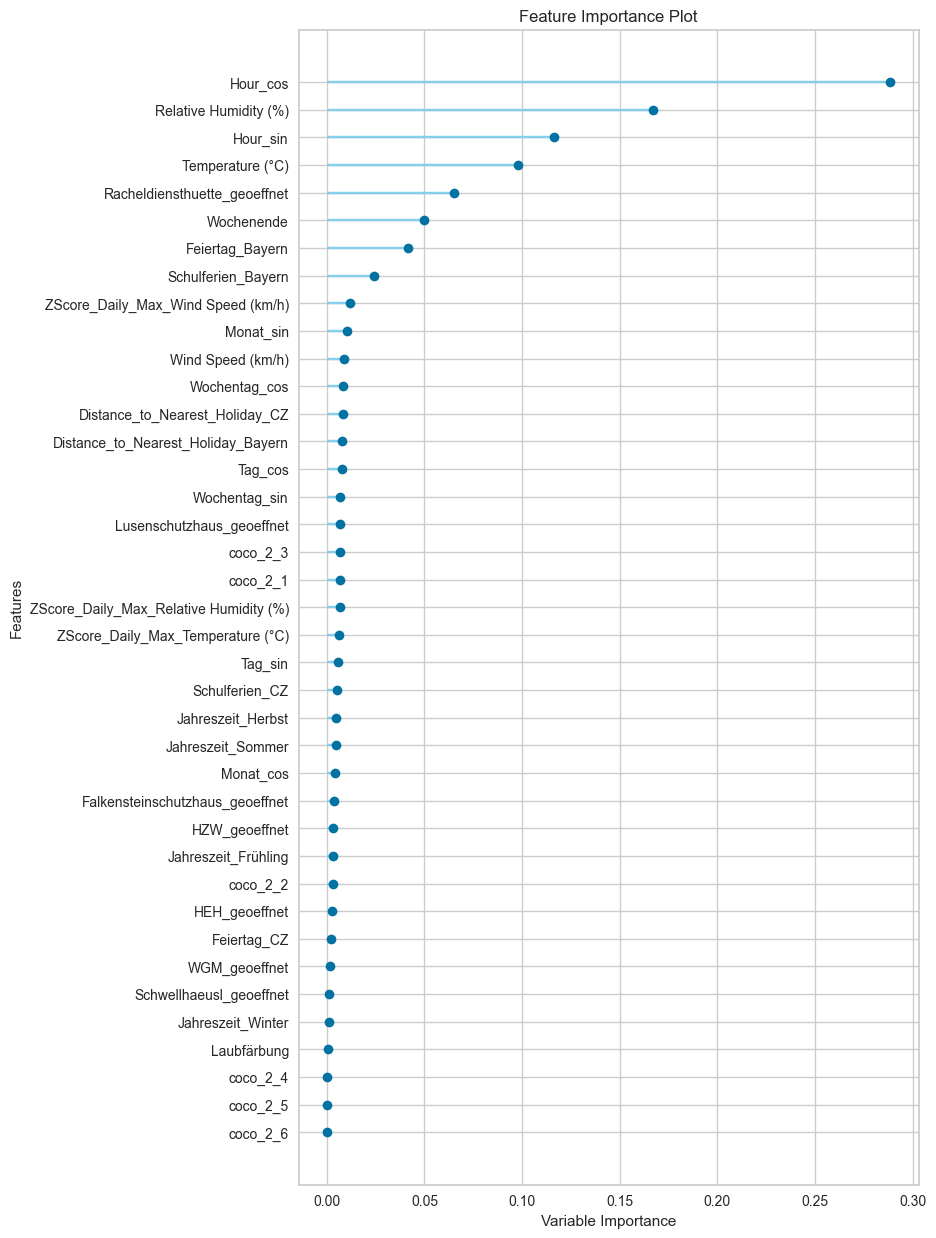

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'sum_IN_abs':


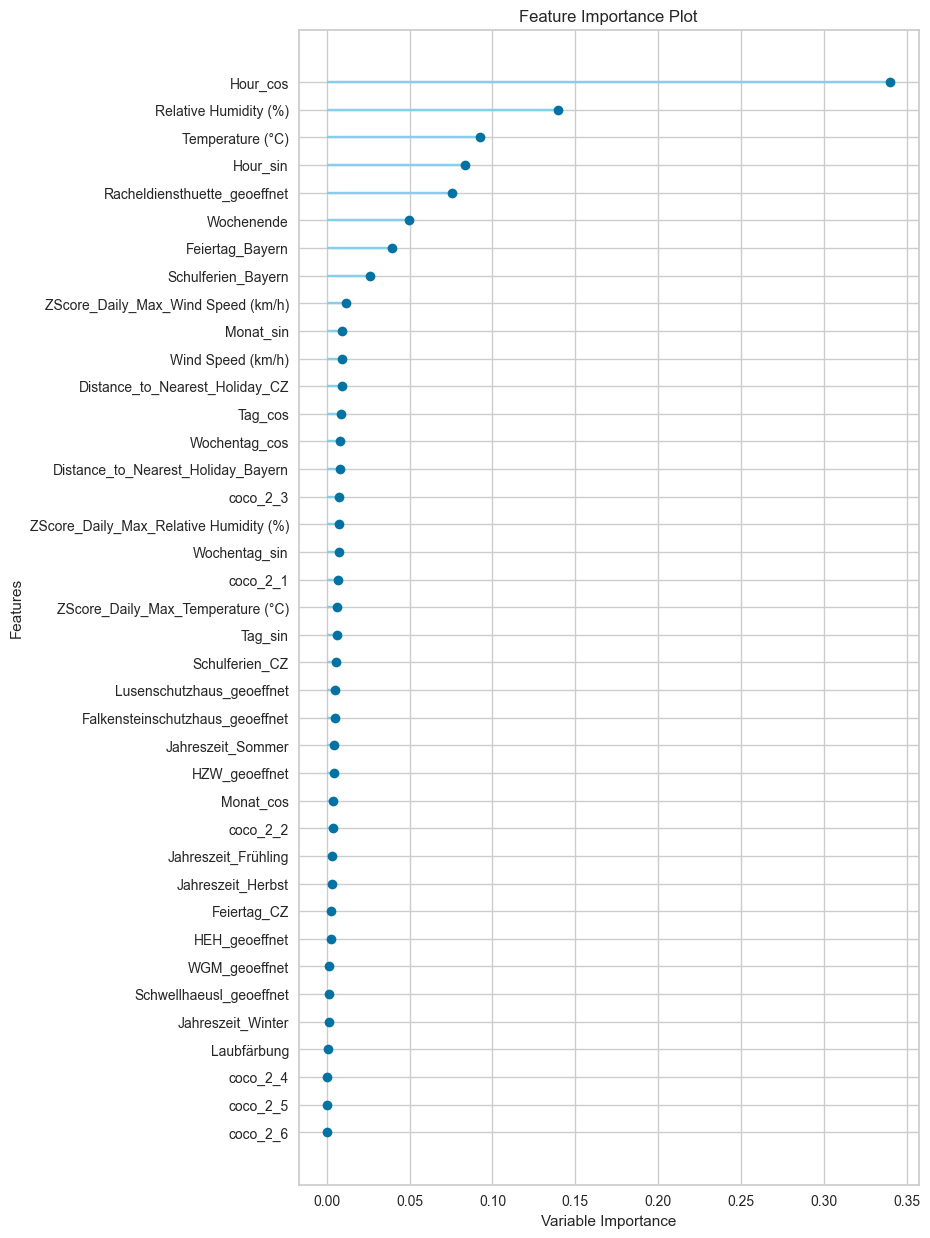

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'sum_OUT_abs':


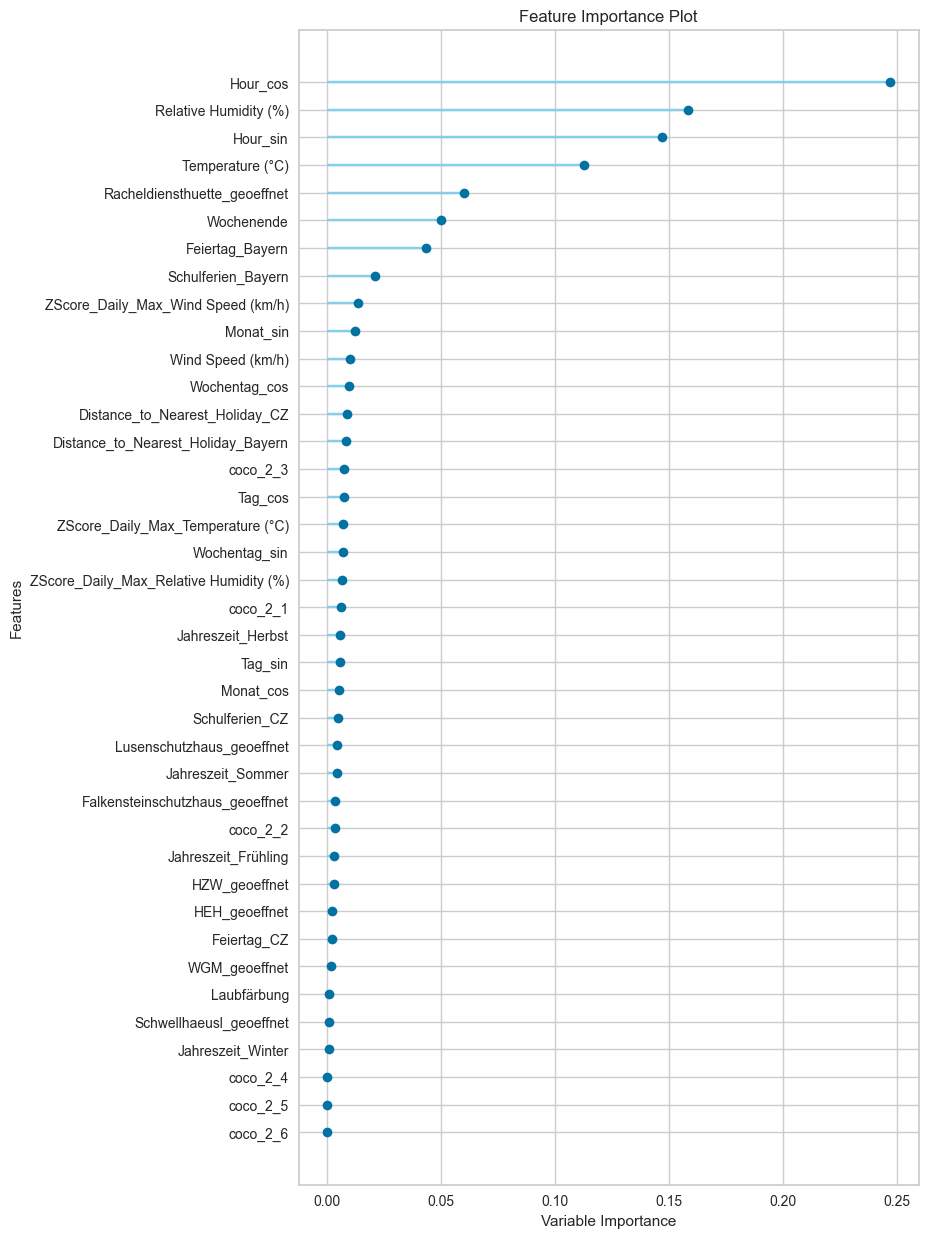

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Lusen-Mauth-Finsterau IN':


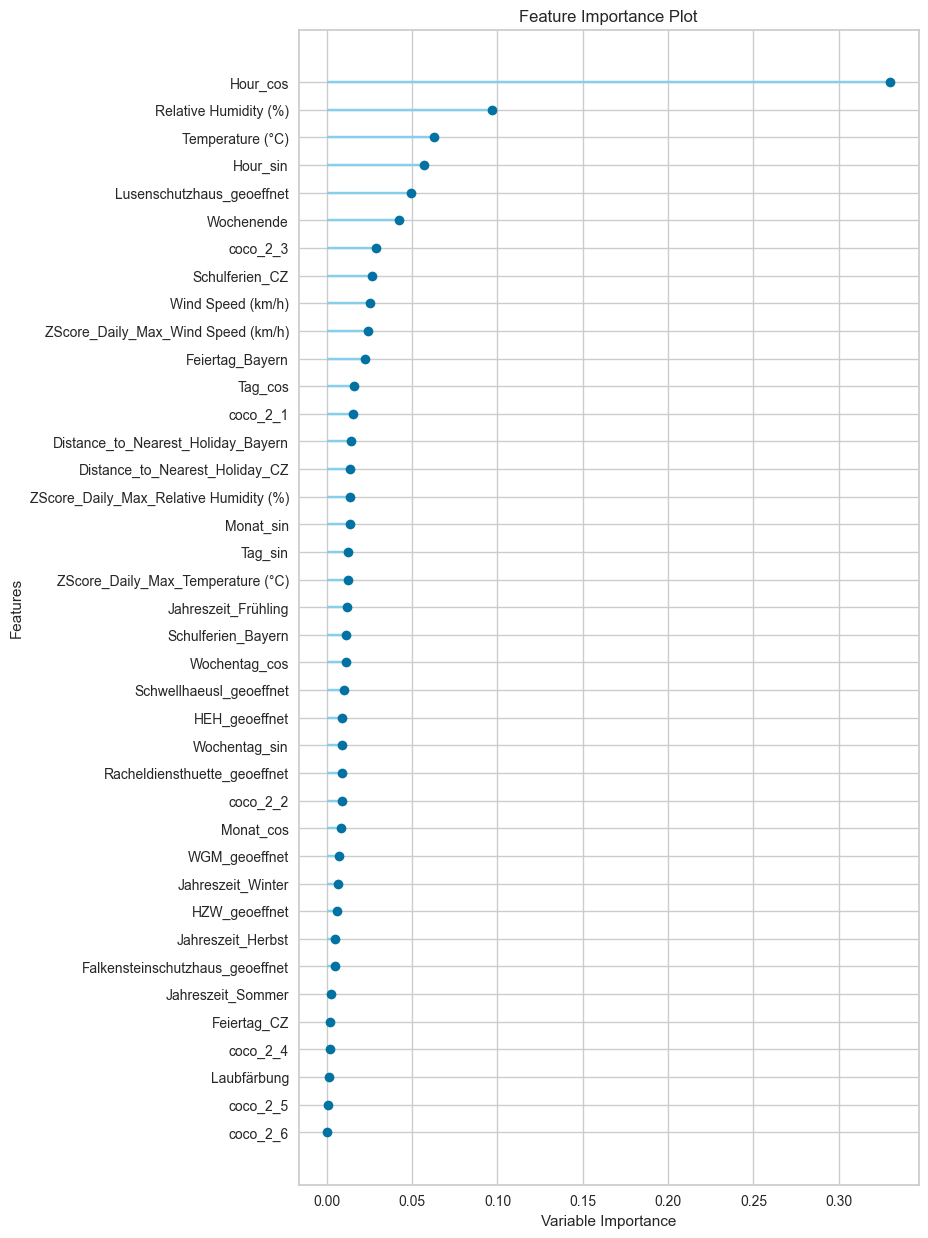

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Lusen-Mauth-Finsterau OUT':


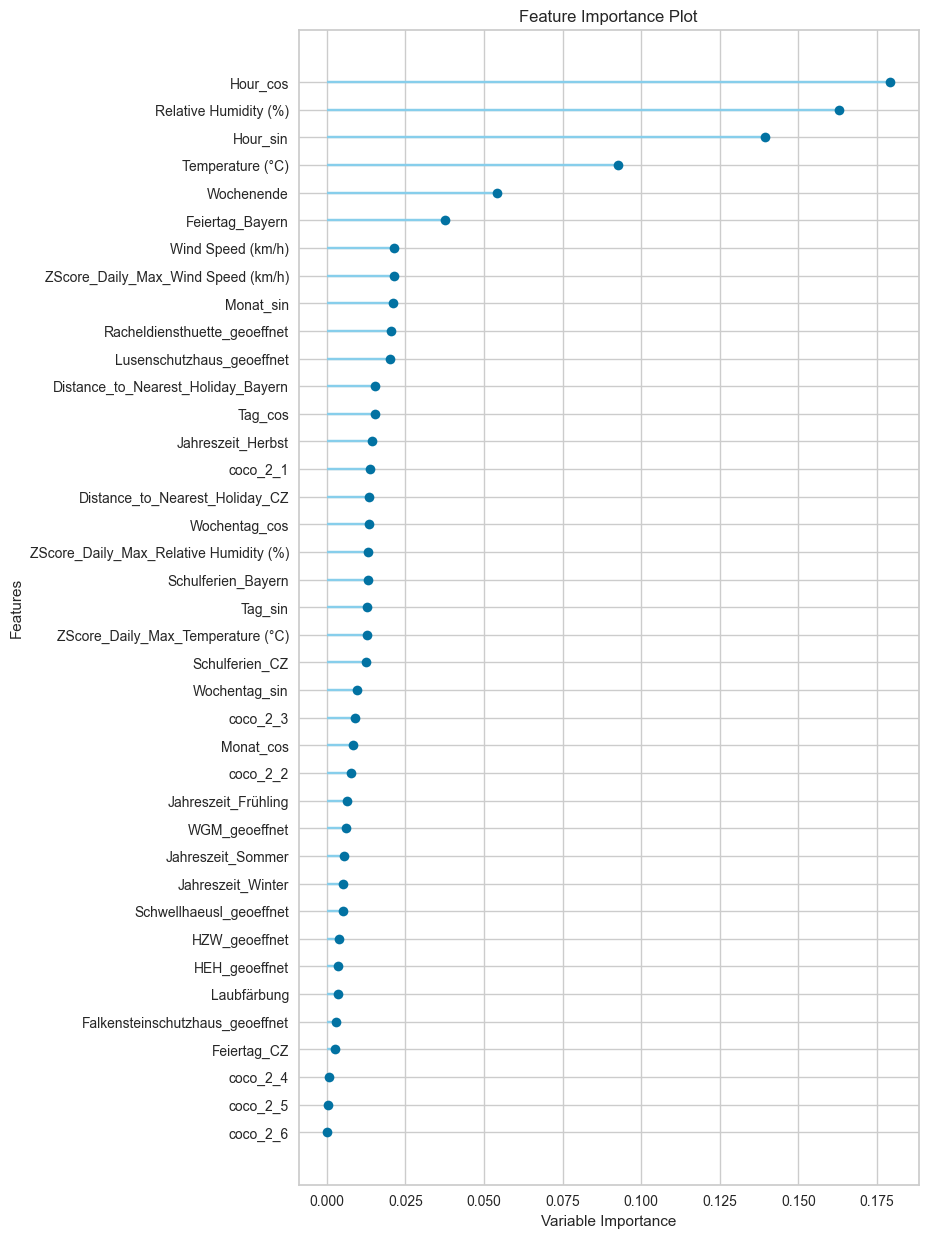

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Nationalparkzentrum Lusen IN':


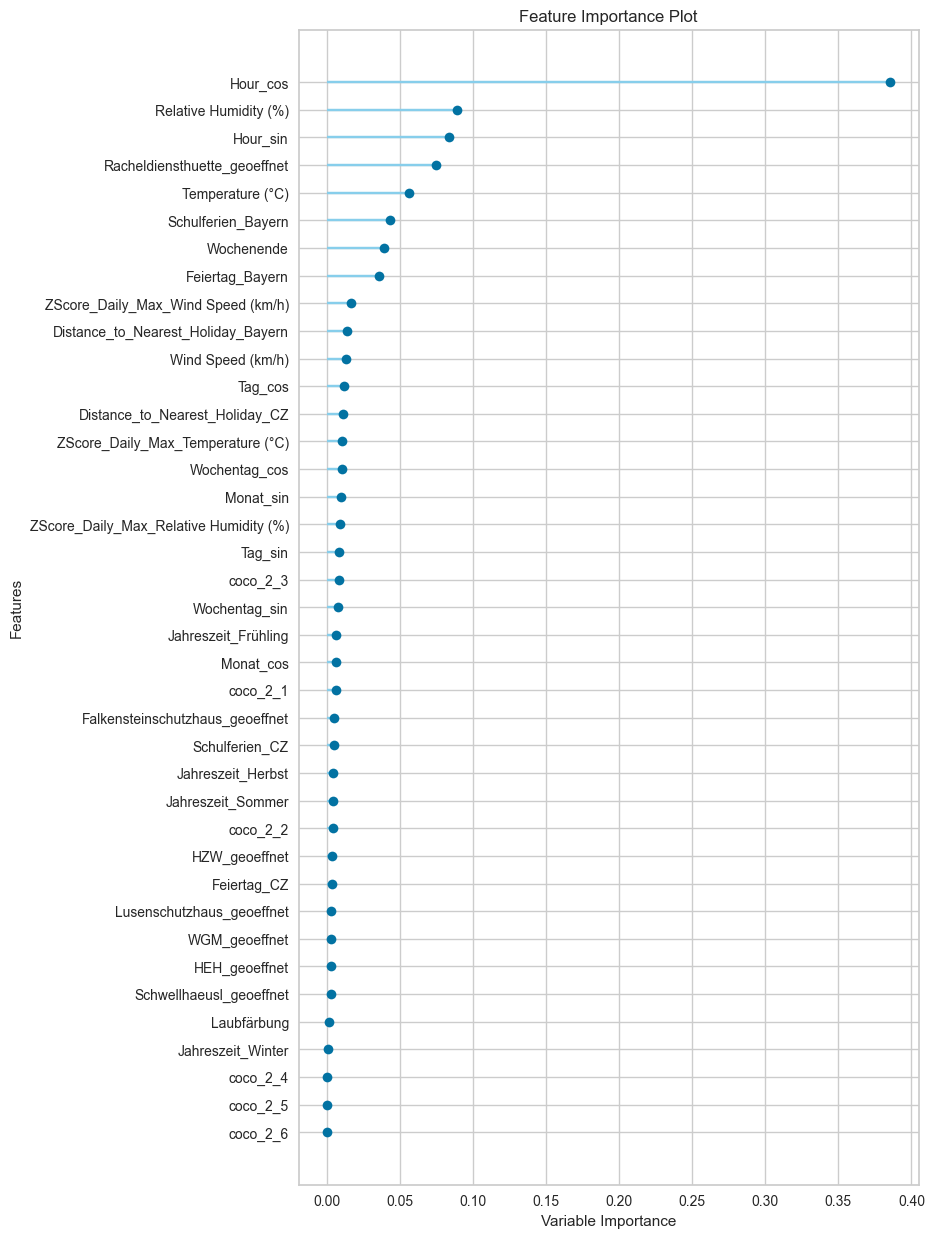

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Nationalparkzentrum Lusen OUT':


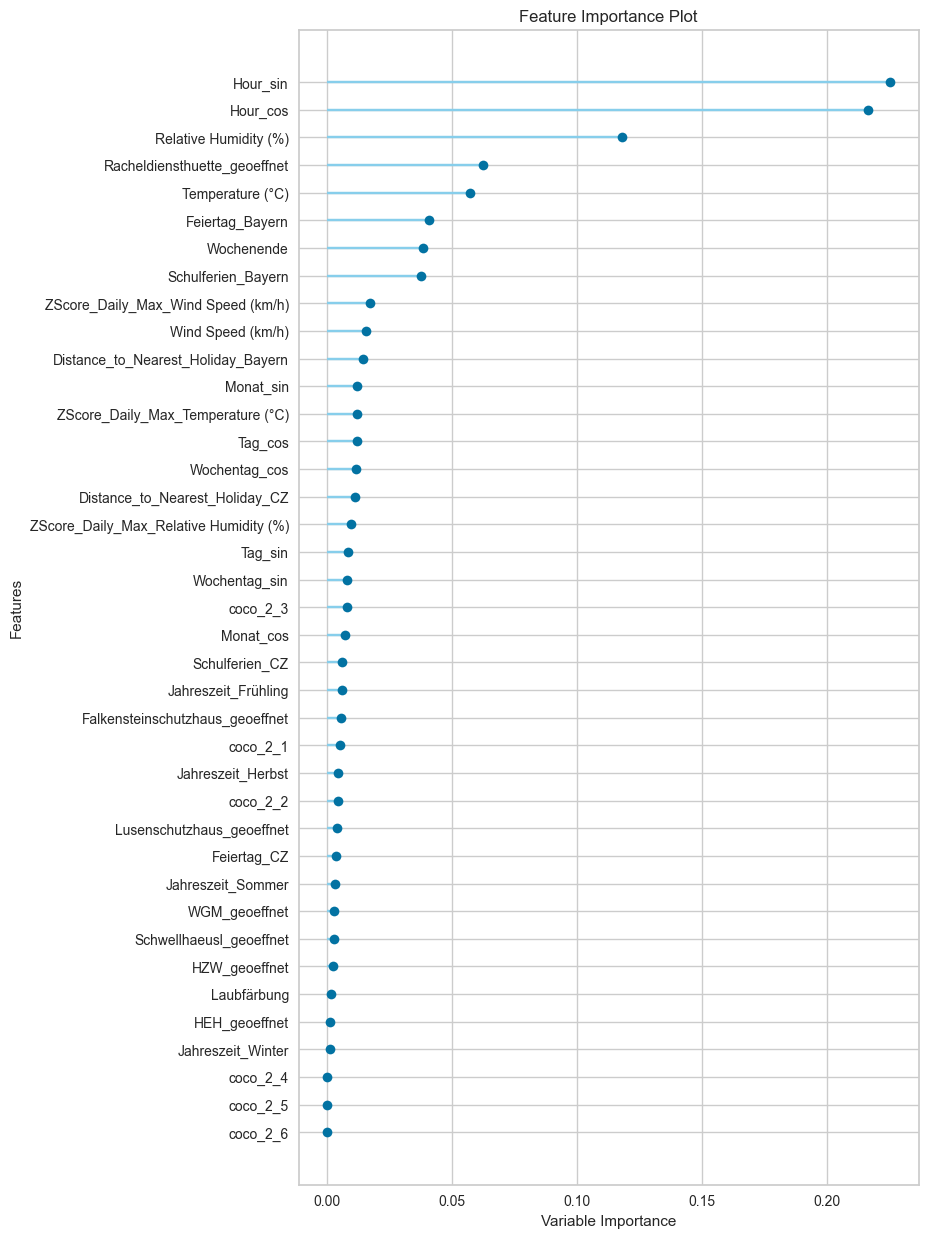

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Rachel-Spiegelau IN':


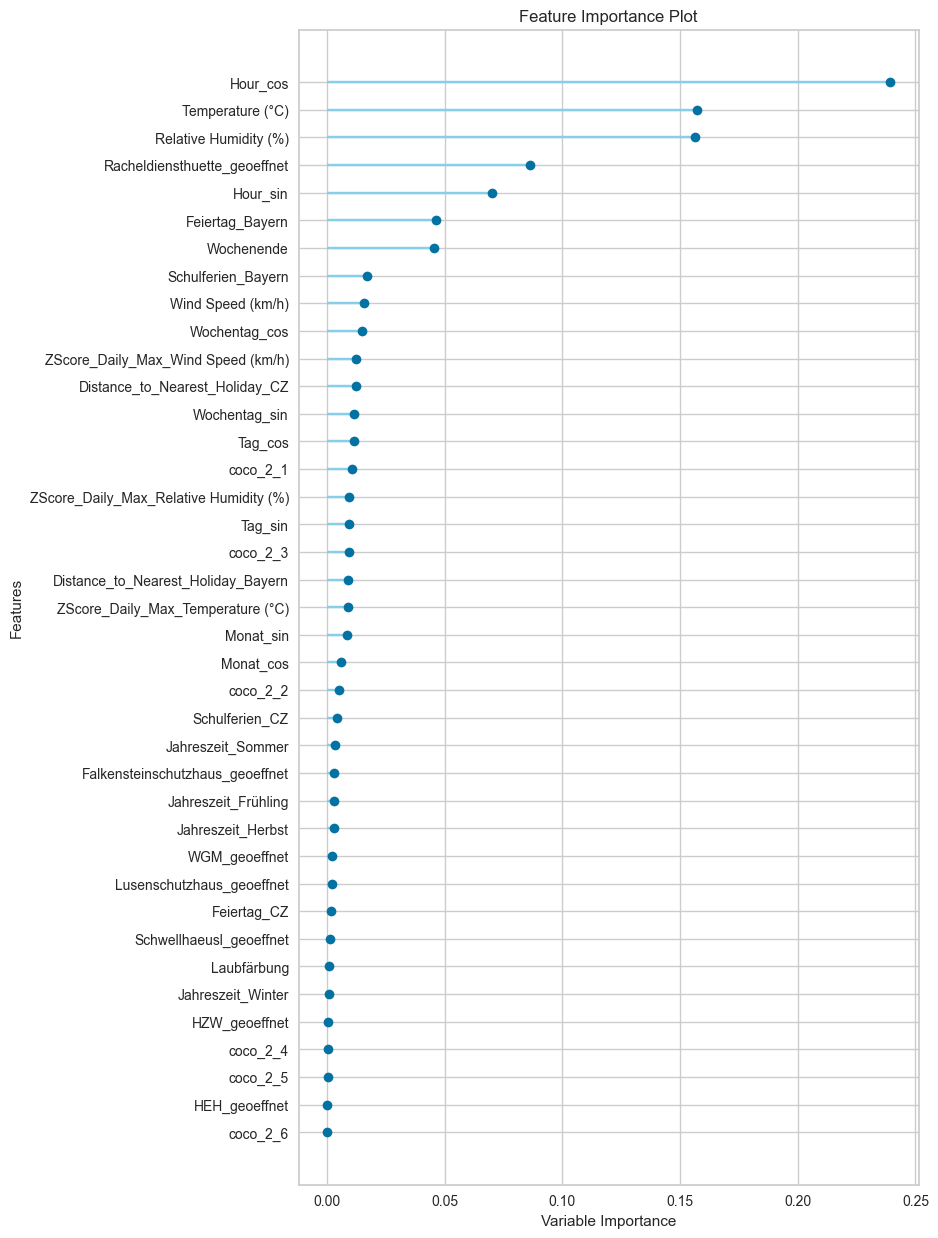

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Rachel-Spiegelau OUT':


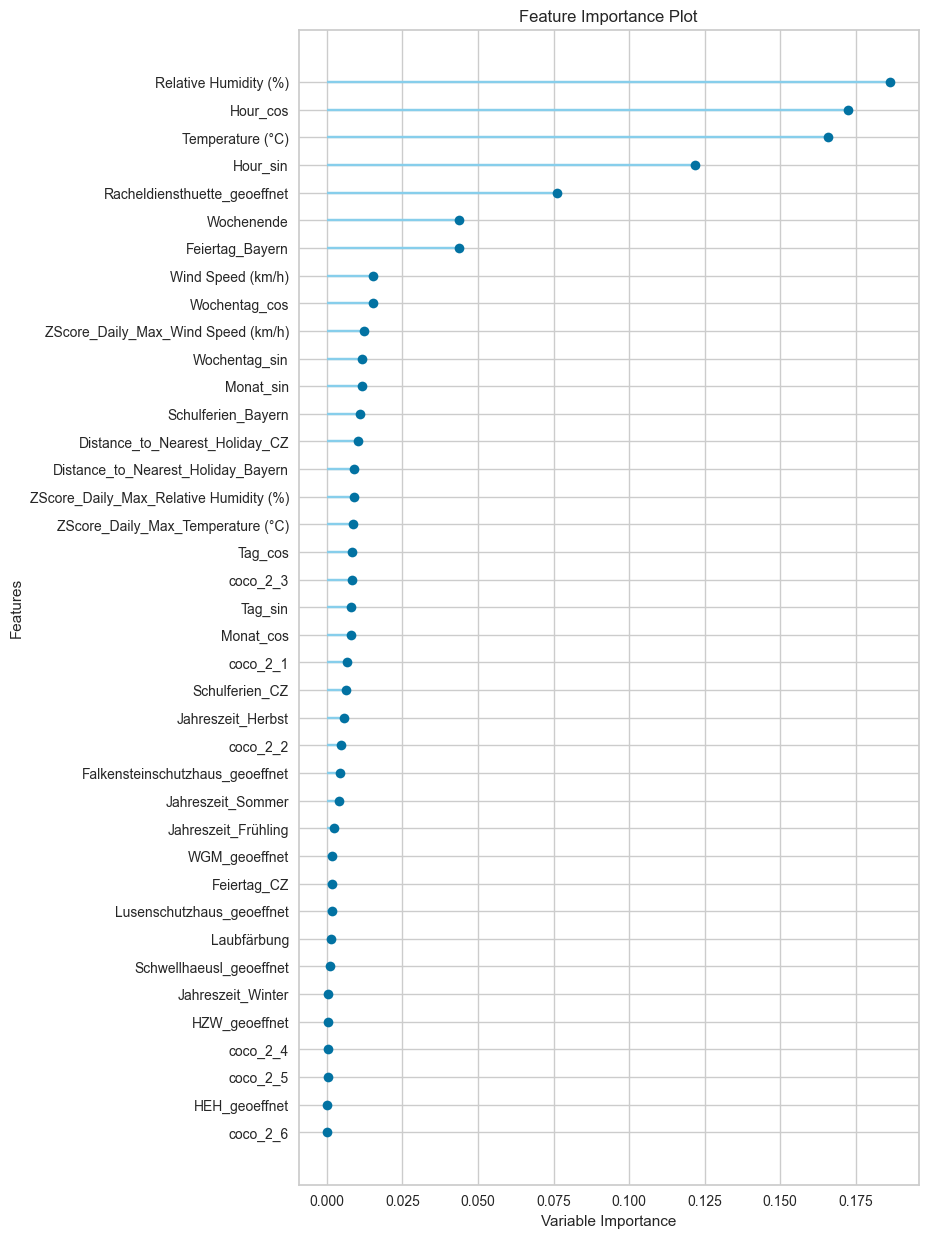

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Falkenstein-Schwellhäusl IN':


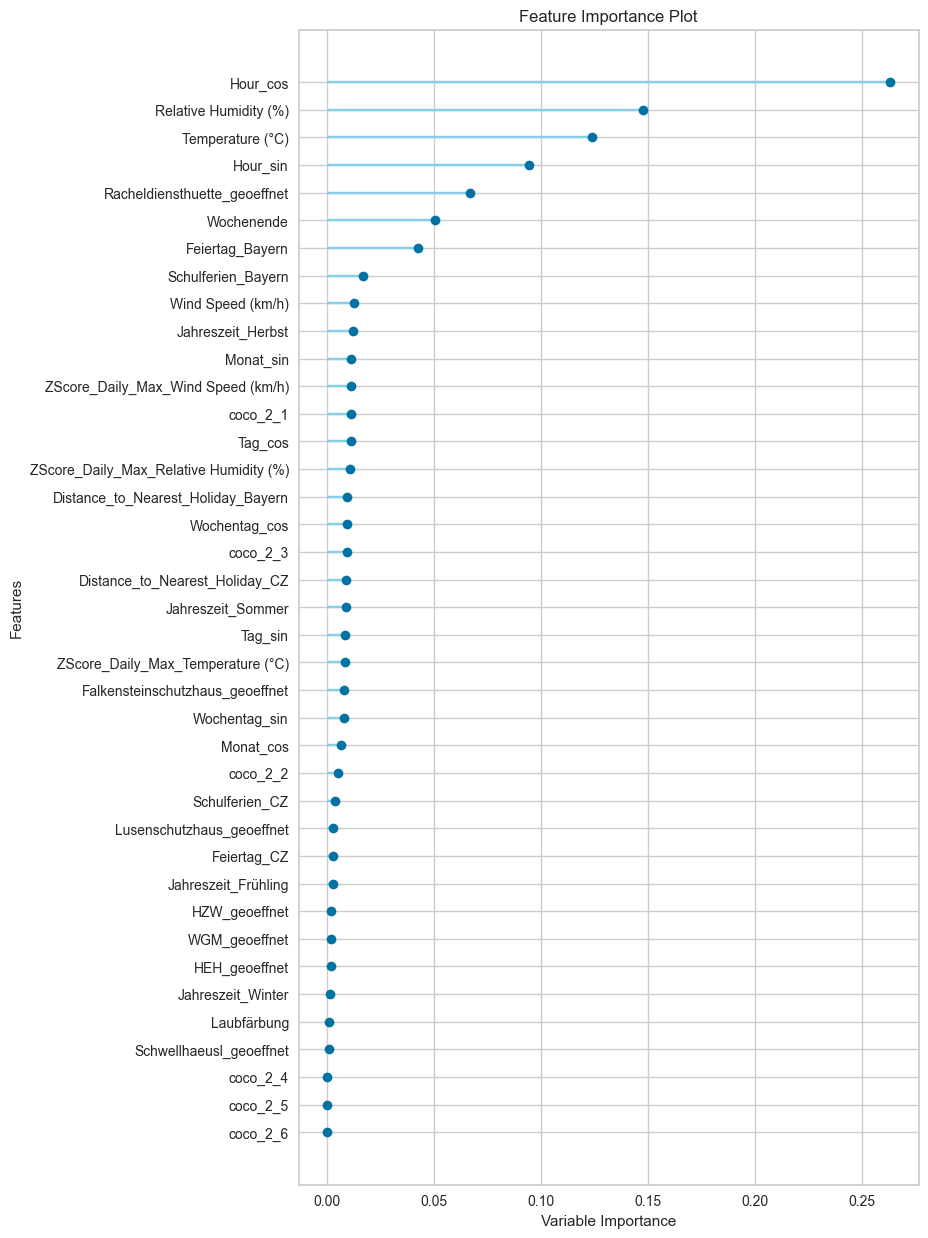

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Falkenstein-Schwellhäusl OUT':


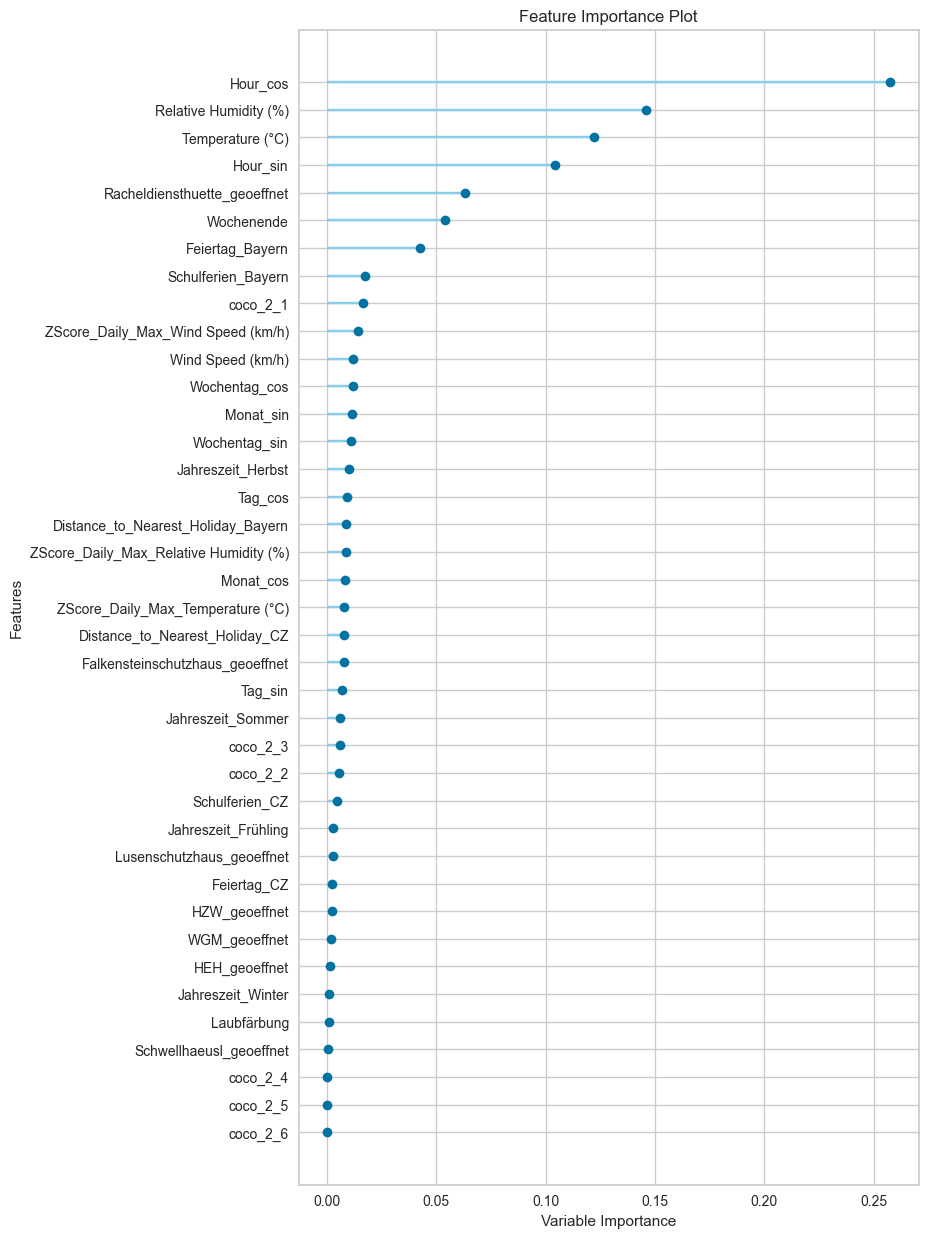

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Scheuereck-Schachten-Trinkwassertalsperre IN':


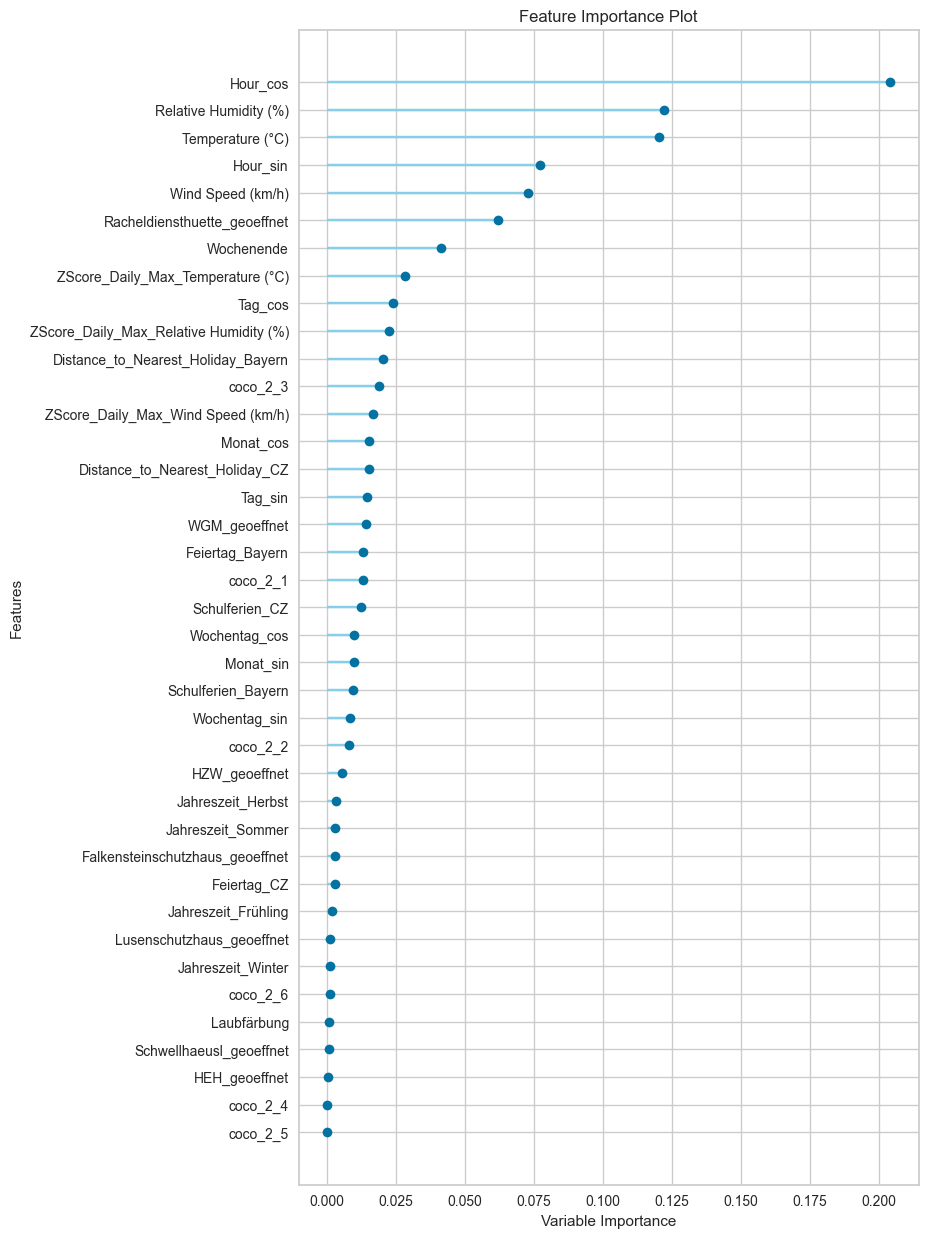

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Scheuereck-Schachten-Trinkwassertalsperre OUT':


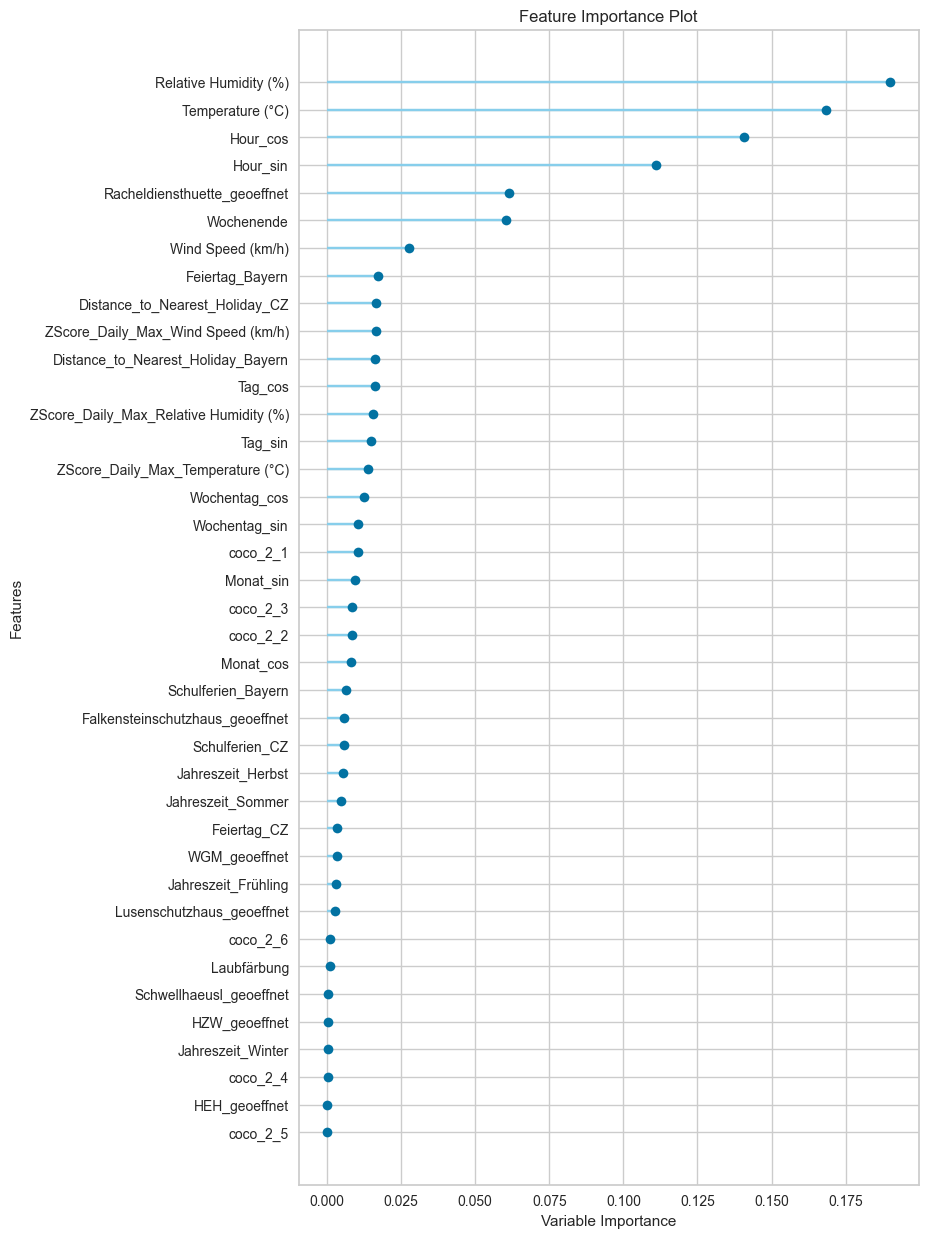

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Nationalparkzentrum Falkenstein IN':


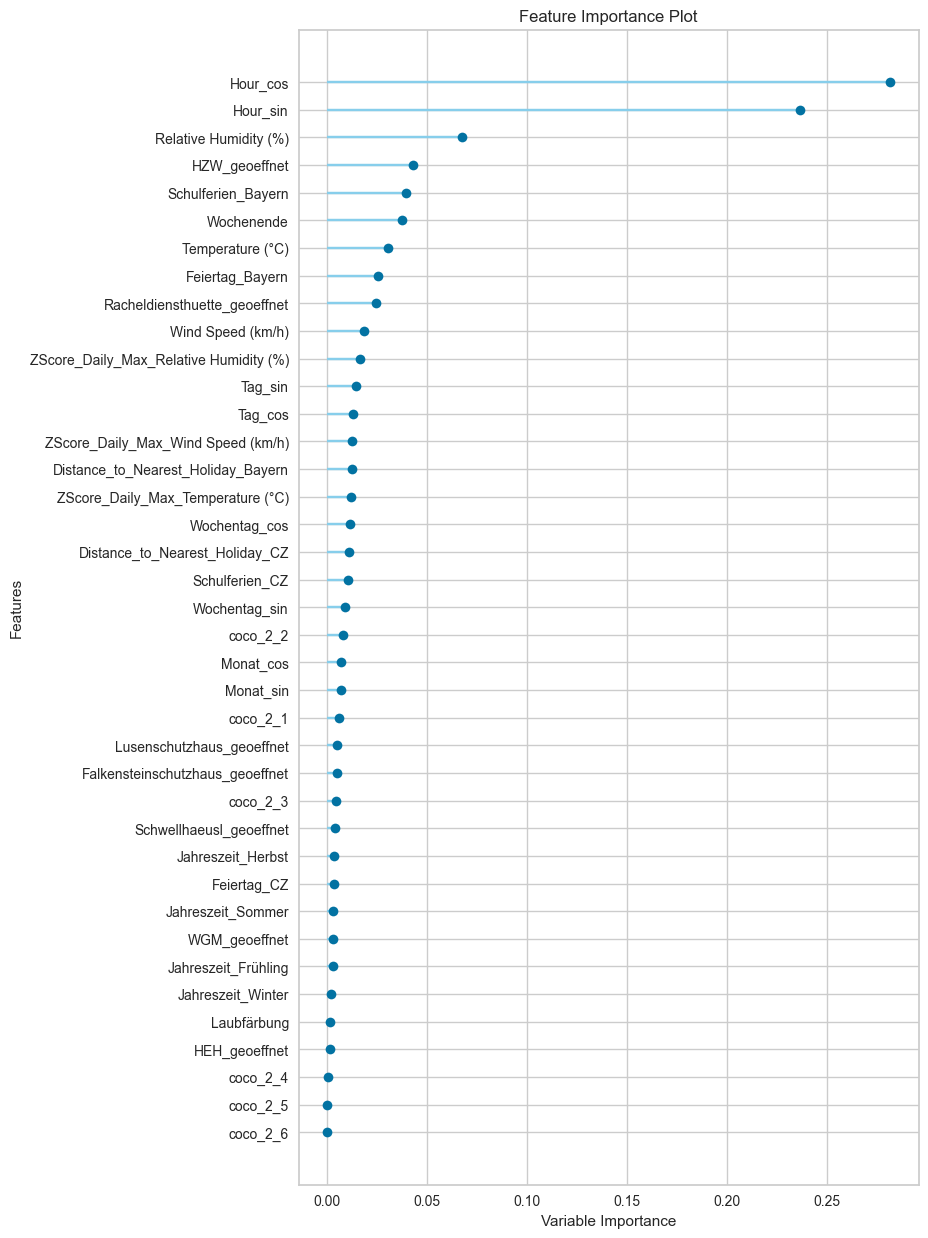

Transformation Pipeline and Model Successfully Loaded
Feature importance for Extra Trees model on target 'Nationalparkzentrum Falkenstein OUT':


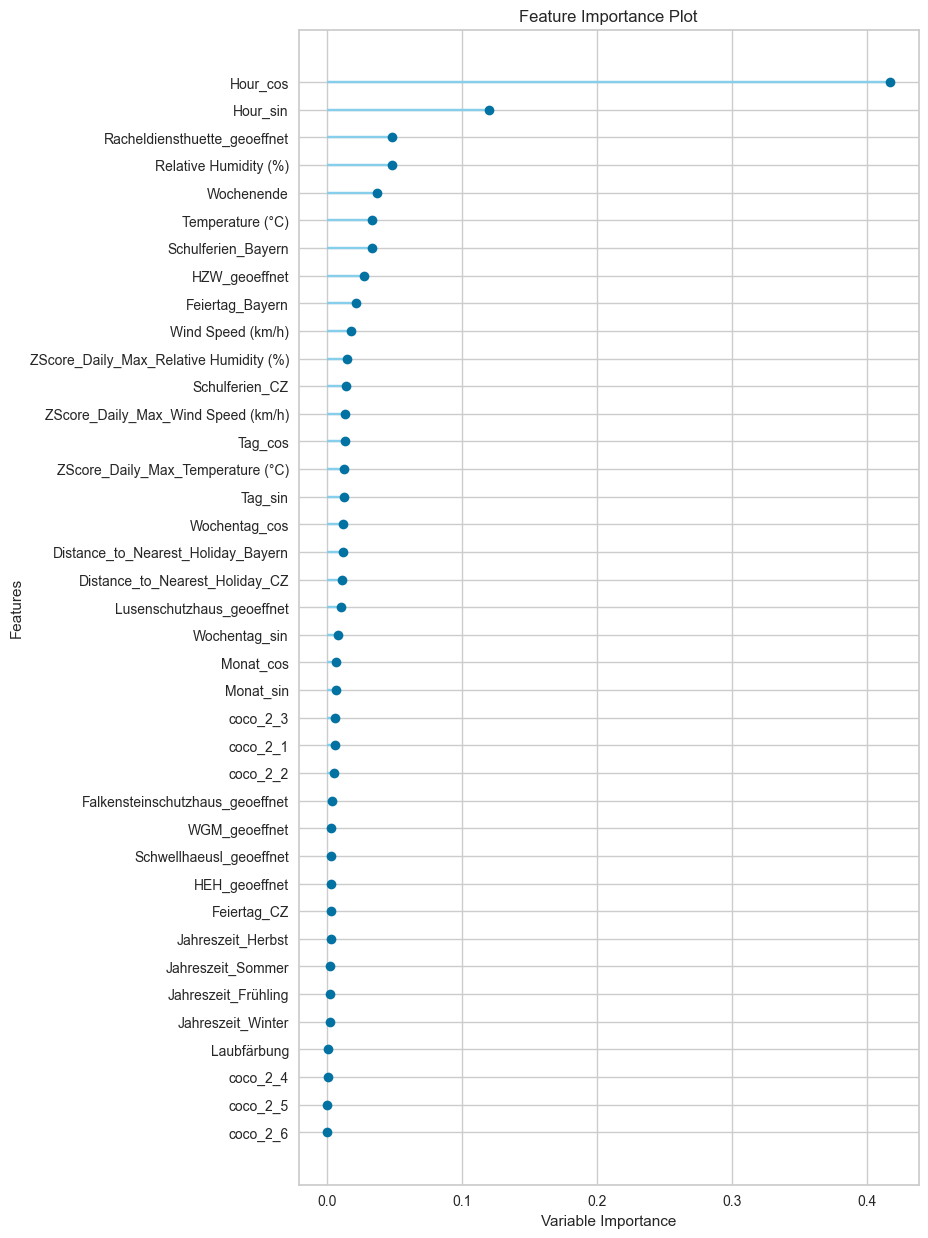

In [338]:
# Define the path to load models
save_path = r"C:\Users\garov\OneDrive\Documents\GitHub\bavarian-forest-visitor-monitoring-dssgx-24"

# Define target variable lists
target_vars_et = ['traffic_abs', 'sum_IN_abs', 'sum_OUT_abs', 'Lusen-Mauth-Finsterau IN', 'Lusen-Mauth-Finsterau OUT', 
               'Nationalparkzentrum Lusen IN', 'Nationalparkzentrum Lusen OUT', 'Rachel-Spiegelau IN', 'Rachel-Spiegelau OUT', 
               'Falkenstein-Schwellhäusl IN', 'Falkenstein-Schwellhäusl OUT', 
               'Scheuereck-Schachten-Trinkwassertalsperre IN', 'Scheuereck-Schachten-Trinkwassertalsperre OUT', 
               'Nationalparkzentrum Falkenstein IN', 'Nationalparkzentrum Falkenstein OUT']


# Plot feature importance for Extra Trees models
for target in target_vars_et:
    model_filename = f'extra_trees_{target}'
    full_model_path = os.path.join(save_path, model_filename)
    
    try:
        # Load the saved model
        loaded_model = load_model(full_model_path)
        
        # Plot feature importance
        print(f"Feature importance for Extra Trees model on target '{target}':")
        plot_model(loaded_model, plot='feature_all')
    
    except FileNotFoundError as e:
        print(f"File not found: {e}")
              

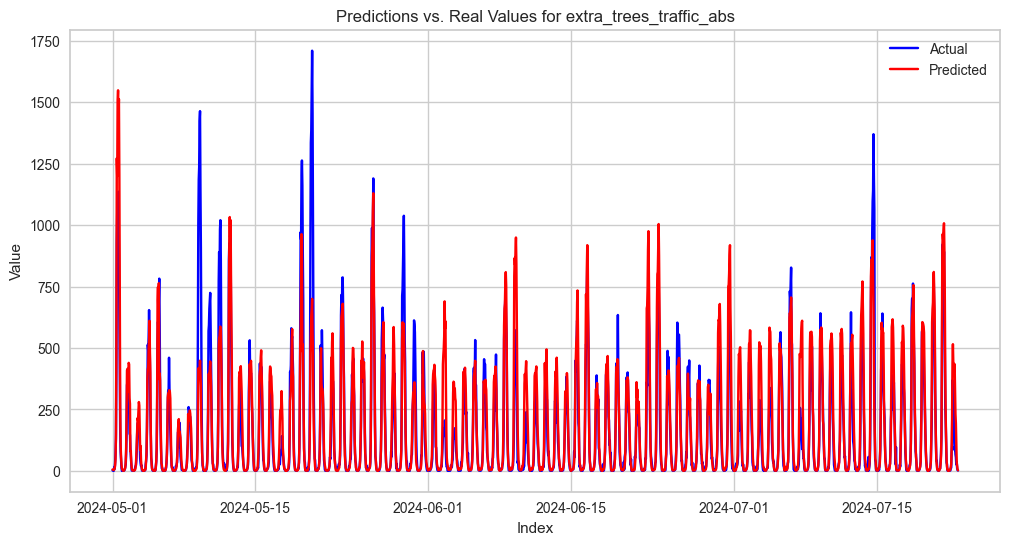

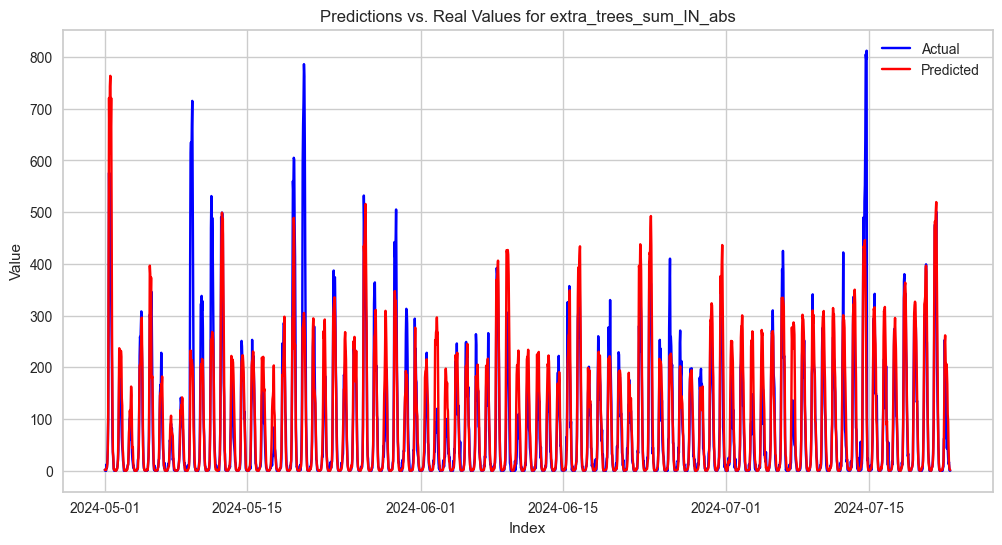

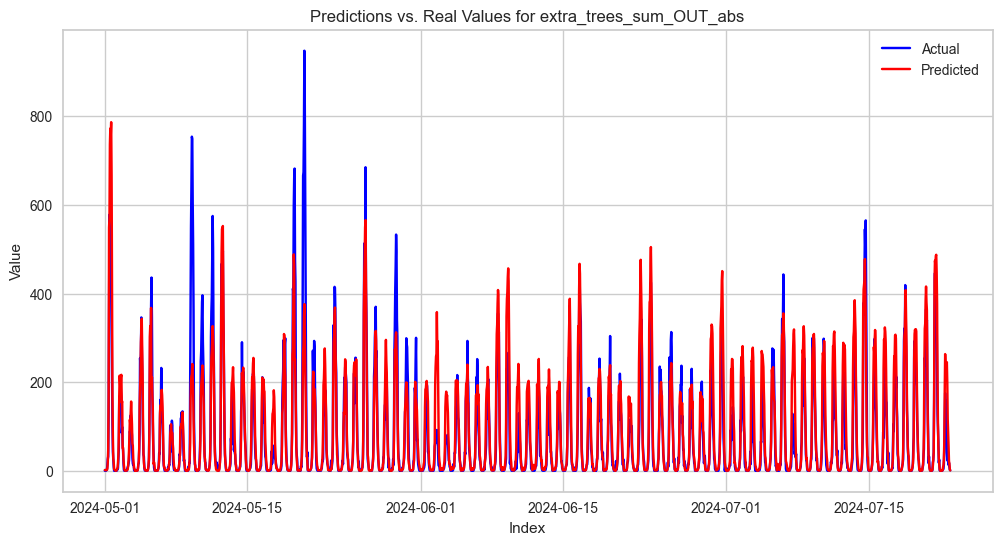

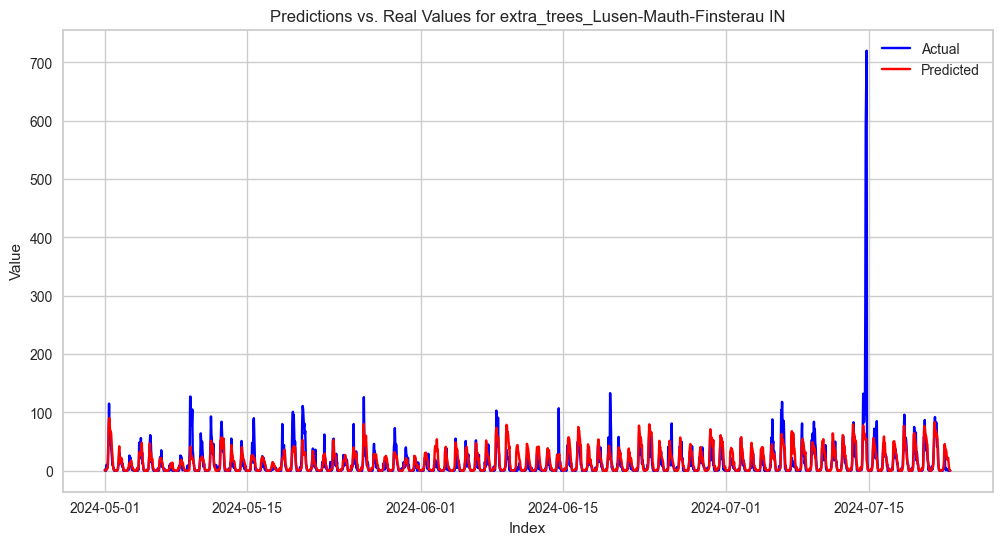

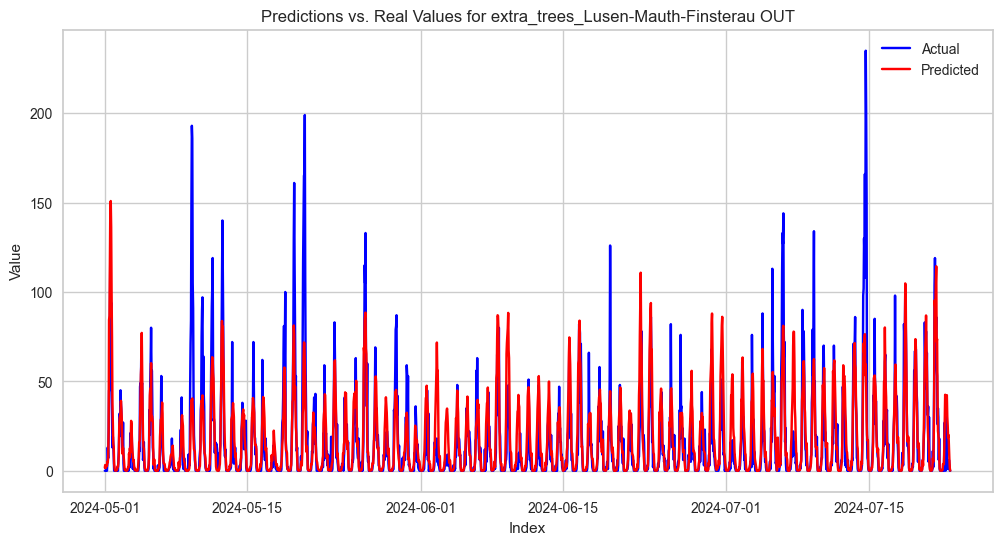

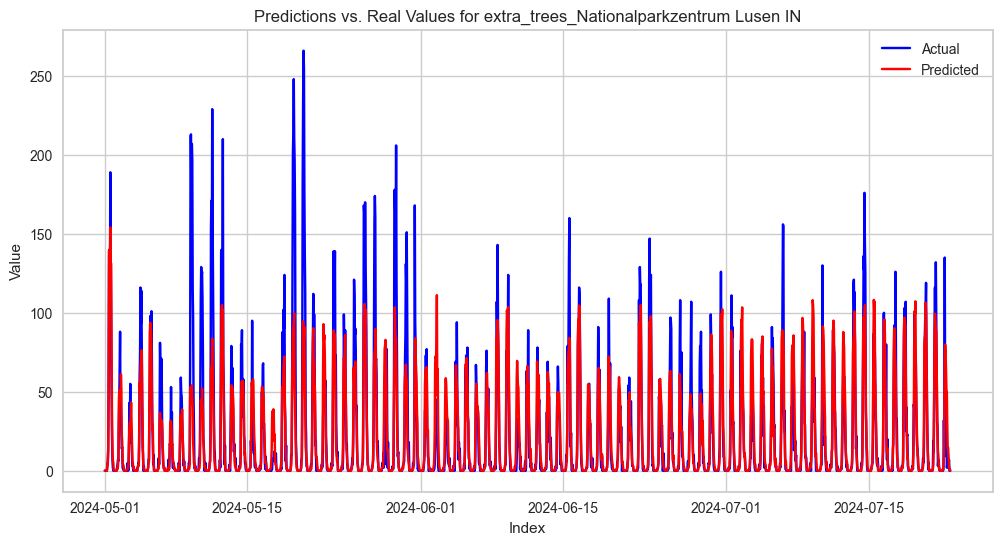

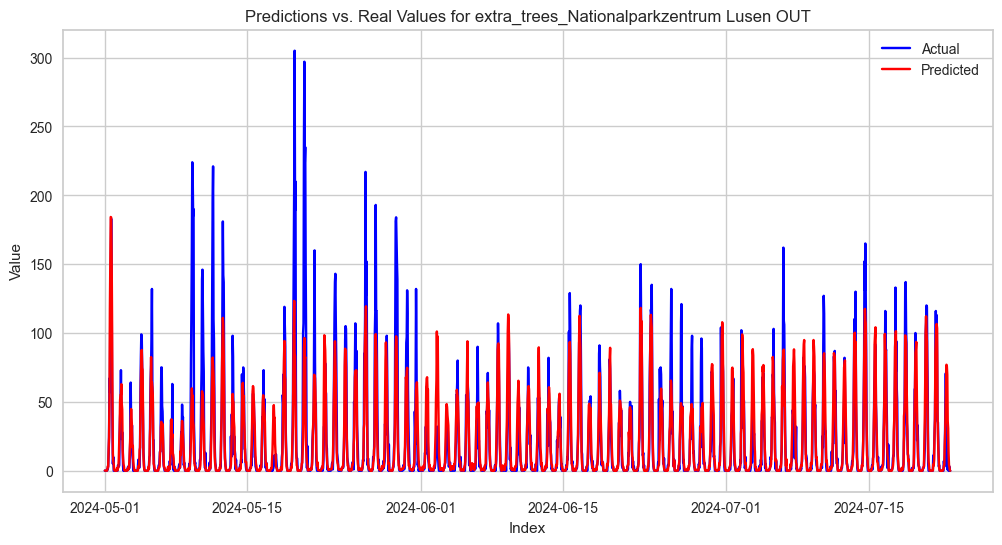

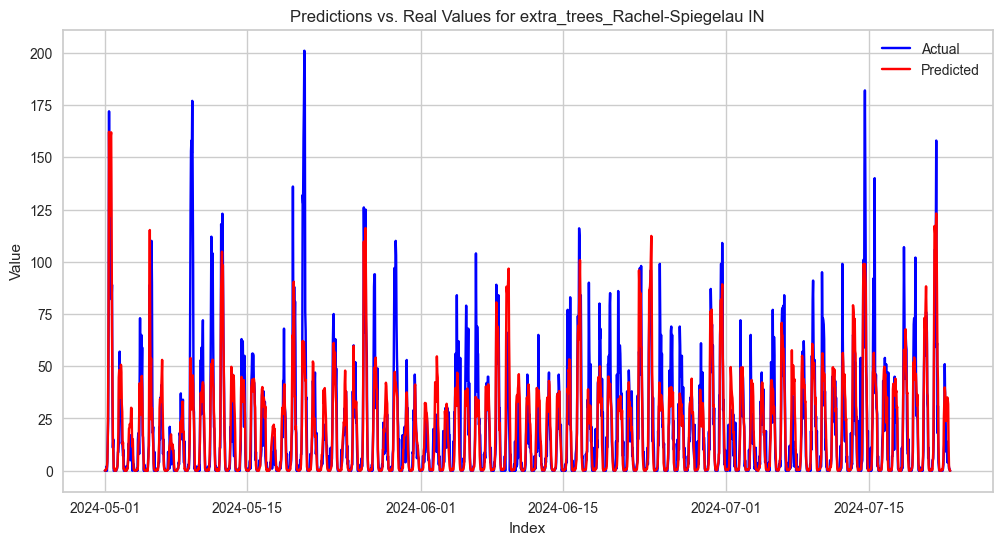

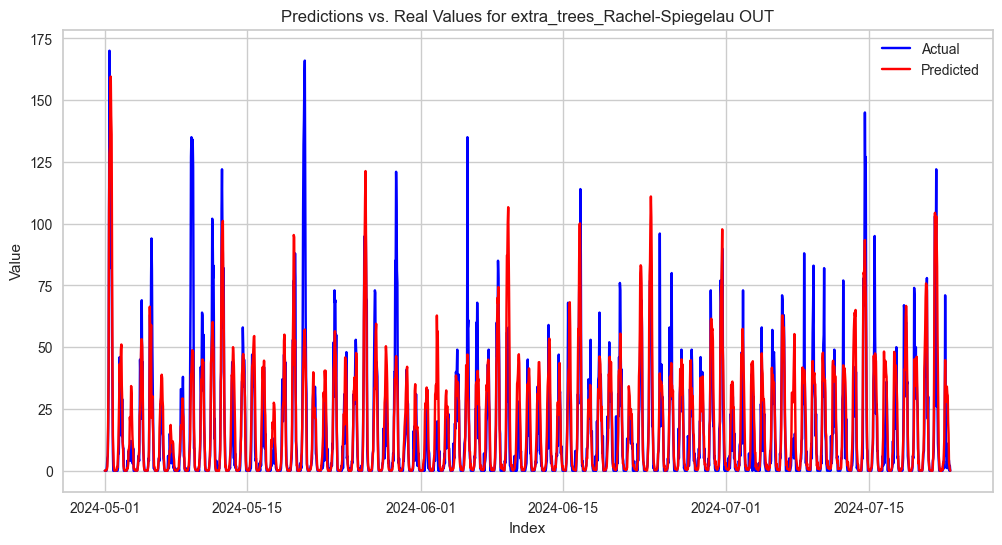

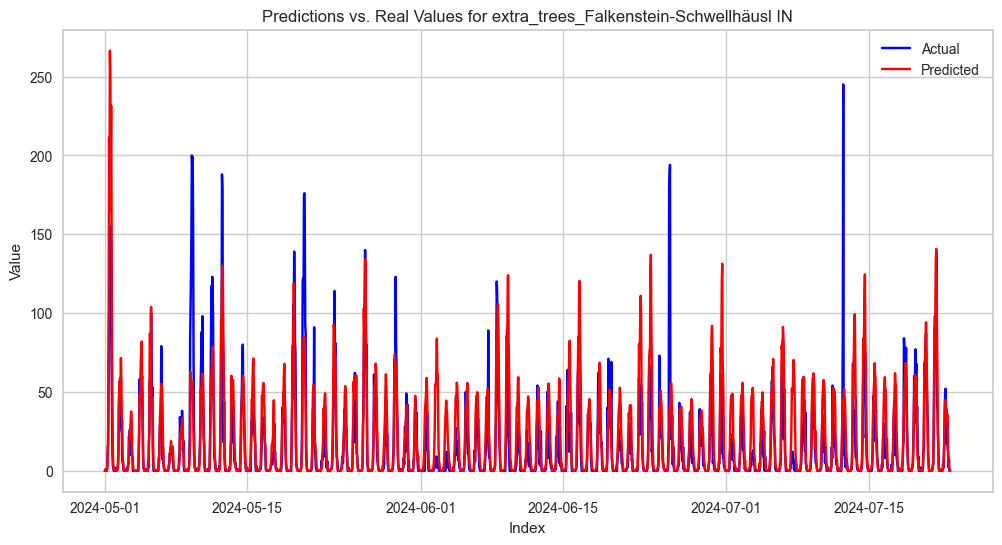

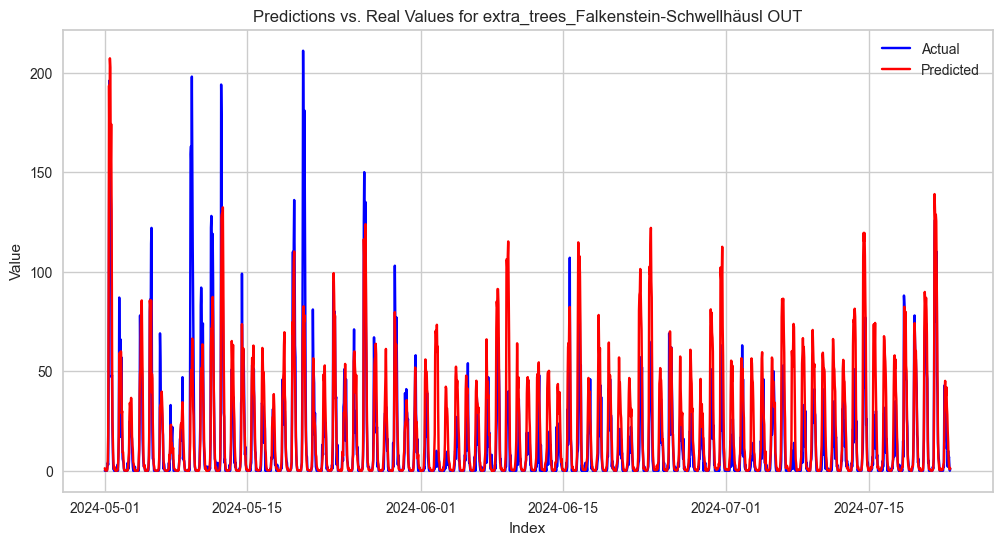

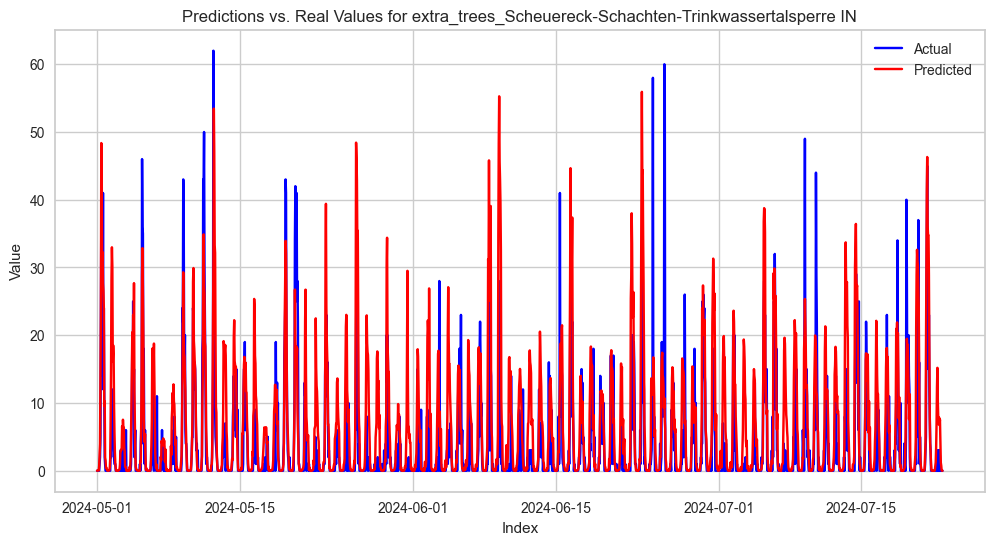

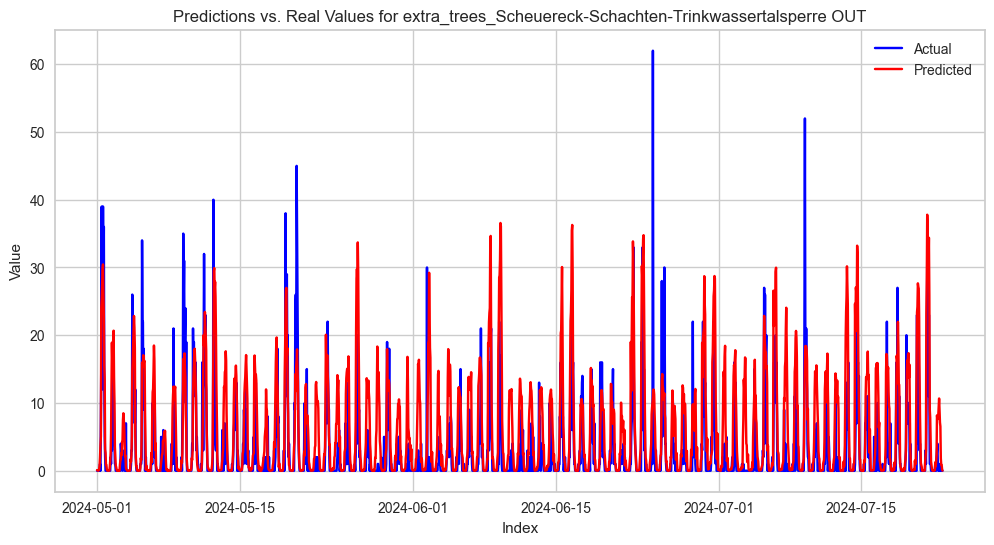

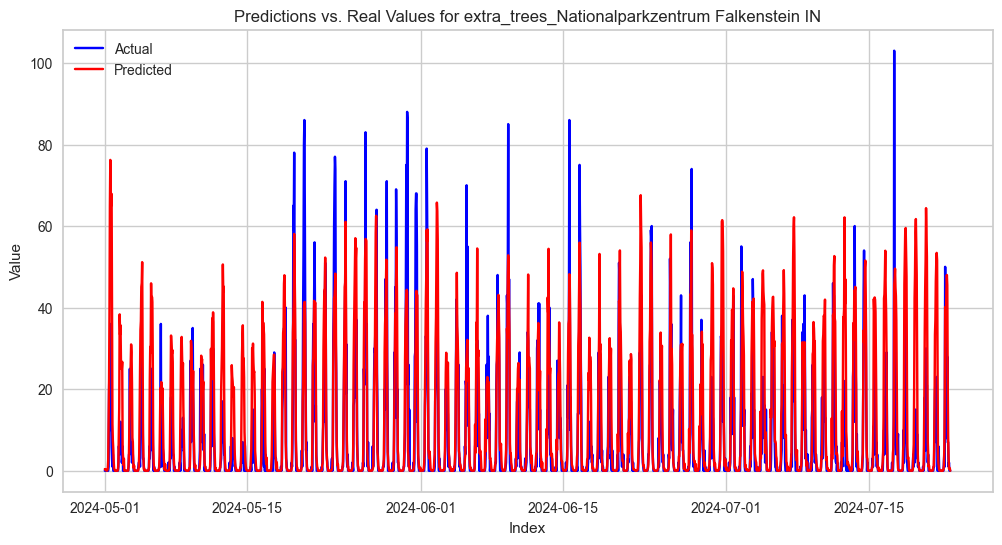

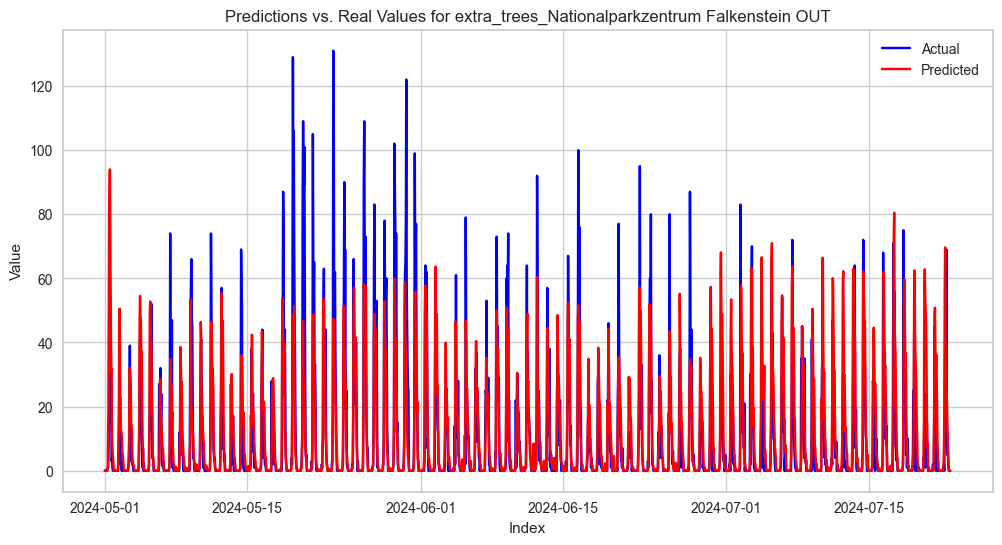

In [339]:
# Visualize predictions for Extra Trees models
for key, predictions_et in predictions_dict_et.items():
    target = key.split('_', 2)[-1]  # This assumes the format 'extra_trees_<target>'
    
    if "prediction_label" in predictions_et.columns and target in predictions_et.columns:
        predictions_vs_real_et = predictions_et[[target, "prediction_label"]].sort_index(ascending=True)
        
        # Create a line plot using Matplotlib
        plt.figure(figsize=(12, 6))
        plt.plot(predictions_vs_real_et.index, predictions_vs_real_et[target], label='Actual', color='blue')
        plt.plot(predictions_vs_real_et.index, predictions_vs_real_et["prediction_label"], label='Predicted', color='red')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title(f"Predictions vs. Real Values for {key}")
        plt.legend()
        plt.show()
    else:
        print(f"Columns '{target}' and 'prediction_label' not found in predictions for {key}")

In [340]:
for key, predictions_et in predictions_dict_et.items():
    target = key.split('_', 2)[-1]  # This assumes the format 'extra_trees_<target>'
    
    if "prediction_label" in predictions_et.columns and target in predictions_et.columns:
        # Resample predictions and actual values on a daily basis
        daily_prediction_comparison = predictions_et[[target, "prediction_label"]].resample("1d").sum()

        # Calculate the mean absolute error (MAE)
        daily_prediction_comparison["mae"] = abs(daily_prediction_comparison[target] - daily_prediction_comparison["prediction_label"])
        print(f"The MAE on a daily basis for {target} is {daily_prediction_comparison['mae'].mean()}.")

        # Plot the actual vs predicted values using Plotly Express
        fig = px.line(daily_prediction_comparison, y=[target, "prediction_label"],
                      labels={"value": "Value", "variable": "Legend"},
                      title=f"Daily Predictions vs Actuals for {target}")
        fig.show()

    else:
        print(f"Columns '{target}' and 'prediction_label' not found in predictions for {key}")


The MAE on a daily basis for traffic_abs is 1148.0445783132527.


The MAE on a daily basis for sum_IN_abs is 571.3103614457831.


The MAE on a daily basis for sum_OUT_abs is 599.8660240963856.


The MAE on a daily basis for Lusen-Mauth-Finsterau IN is 145.935421686747.


The MAE on a daily basis for Lusen-Mauth-Finsterau OUT is 138.4089156626506.


The MAE on a daily basis for Nationalparkzentrum Lusen IN is 151.84397590361445.


The MAE on a daily basis for Nationalparkzentrum Lusen OUT is 145.66289156626507.


The MAE on a daily basis for Rachel-Spiegelau IN is 128.06457831325304.


The MAE on a daily basis for Rachel-Spiegelau OUT is 112.01397590361448.


The MAE on a daily basis for Falkenstein-Schwellhäusl IN is 190.49819277108435.


The MAE on a daily basis for Falkenstein-Schwellhäusl OUT is 200.00698795180725.


The MAE on a daily basis for Scheuereck-Schachten-Trinkwassertalsperre IN is 72.66048192771085.


The MAE on a daily basis for Scheuereck-Schachten-Trinkwassertalsperre OUT is 71.69373493975904.


The MAE on a daily basis for Nationalparkzentrum Falkenstein IN is 107.79722891566266.


The MAE on a daily basis for Nationalparkzentrum Falkenstein OUT is 98.51240963855423.


In [ ]:
for key, predictions_et in predictions_dict_et.items():
    target = key.split('_', 2)[-1]  # This assumes the format 'extra_trees_<target>'
    
    if "prediction_label" in predictions_et.columns and target in predictions_et.columns:
        # Resample predictions and actual values on a daily basis
        daily_prediction_comparison = predictions_et[[target, "prediction_label"]].resample("1d").sum()

        # Calculate the mean absolute error (MAE) on a daily basis
        daily_prediction_comparison["mae"] = abs(daily_prediction_comparison[target] - daily_prediction_comparison["prediction_label"])

        # Print the average number of people visiting the park (or any other target)
        print(f"On average, {daily_prediction_comparison[target].mean()} people are visiting the park daily for {target}.")

        # Create a box plot of the MAE using Plotly Express
        fig_box = px.box(daily_prediction_comparison, y="mae", title=f"MAE Distribution for {target}")
        fig_box.show()

        # Identify the top 50 days with the highest error
        high_error_dates = daily_prediction_comparison["mae"].sort_values(ascending=False).head(50)
        print(high_error_dates)

        # Retrieve and print training data columns using PyCaret's get_config function
        X_train = get_config('X_train')
        X_train_columns = X_train.columns.to_list()
        print(f"Training columns for {target}: {X_train_columns}")

    else:
        print(f"Columns '{target}' and 'prediction_label' not found in predictions for {key}")



In [ ]:
# Define start and end dates for inference
start_date = datetime.now()
end_date = start_date + pd.Timedelta(days=7)
#start_date = datetime(2016, 1, 1)
#end_date = datetime (2024, 7, 22)

# Coordinates of the Bavarian Forest (Haselbach)
# These coordinates are based on the weather recommendation by Google for a Bavarian Forest Weather search
LATITUDE = 49.31452390542327
LONGITUDE = 12.711573421032

# Create an hourly date range for inference
inference_index = pd.date_range(
    start=pd.to_datetime(start_date),
    end=pd.to_datetime(end_date),
    freq="1h"
)

# Create an empty DataFrame for inference with X_train columns
inference_df = pd.DataFrame(index=inference_index, columns=X_train_columns)

# Ensure the index is at the hourly level by flooring it to the hour
inference_df.index = pd.DatetimeIndex(inference_df.index).floor('H')

# Drop rows in inference_df that are outside the START_TIME and END_TIME range
inference_df = inference_df[(inference_df.index >= pd.Timestamp(start_date).floor('H')) & 
                            (inference_df.index <= pd.Timestamp(end_date).floor('H'))]

# Add date-related features using cyclic transformations (e.g., Hour, Monat)
inference_df["Hour"] = inference_df.index.hour
inference_df["Monat"] = inference_df.index.month

inference_df.head()


In [ ]:
def load_csv_files_from_aws_s3(path: str, **kwargs) -> pd.DataFrame:
    """Loads individual or multiple CSV files from an AWS S3 bucket.
    Args:
        path (str): The path to the CSV files on AWS S3.
        **kwargs: Additional arguments to pass to the read_csv function.
    Returns:
        pd.DataFrame: The DataFrame containing the data from the CSV files.
    """
    df2 = wr.s3.read_csv(path=path, **kwargs)
    return df2
df2 = load_csv_files_from_aws_s3(
    path="s3://dssgx-munich-2024-bavarian-forest/preprocessed_data/df_visitcenters_hourly.csv"
)

df2.tail()

In [ ]:
print(LATITUDE)
print(LONGITUDE)

In [120]:
# Ignore warnings
warnings.filterwarnings('ignore')

def fill_missing_values(data, parameters):
    """
    Fill missing values in the weather data using linear interpolation or zero values.

    Args:
        data (pandas.DataFrame): Processed hourly weather data.
        parameters (list): List of column names to process.

    Returns:
        pandas.DataFrame: DataFrame with missing values filled.
    """
    total_rows = data.shape[0]

    for parameter in parameters:
        # Calculate missing values and their percentage
        missing_values = data[parameter].isnull().sum()
        missing_percentage = (missing_values / total_rows) * 100

        # Calculate zero values and their percentage
        zero_values = data[parameter].eq(0).sum()
        zero_percentage = (zero_values / total_rows) * 100

        # Check for missing values in the 'Time' column
        if parameter == 'Time' and missing_values > 0:
            print(f'Missing values in Time column: {missing_percentage:.2f}%')
            print('Please check the missing values in the Time column')
            exit()

        if missing_values == 0:
            print(f'No missing values in {parameter} column')
        else:
            print(f'Missing values in {parameter} column: {missing_percentage:.2f}%')

            if zero_percentage > 60:
                # Fill missing values with 0.0 if zero values are significant
                print(f'Zero values in {parameter} column: {zero_percentage:.2f}%')
                data[parameter].fillna(0.0, inplace=True)
                print(f'Missing values in {parameter} column filled with 0.0')
            else:
                # Use linear interpolation to fill missing values
                data[parameter].interpolate(method='linear', inplace=True)
                # Round the interpolated values to 2 decimal places
                data[parameter] = data[parameter].round(2)
                print(f'Missing values in {parameter} column filled using linear interpolation')

    return data


def process_weather_data(weather_data_df):
    """
    Process the hourly weather data by filling missing values.

    Args:
        weather_data_df (pandas.DataFrame): Hourly weather data.
    
    Returns:
        pandas.DataFrame: Processed weather data with missing values filled.
    """


    # Get the list of columns to process
    parameters = weather_data_df.columns.to_list()

    print(f'Processing weather data with the following columns: {parameters}')

    # Fill missing values in the weather data
    imputed_data = fill_missing_values(weather_data_df, parameters)

    return imputed_data

In [ ]:
process_weather_data = process_weather_data(weather_data_df)

In [ ]:
process_weather_data.head()

In [ ]:
df.head()

In [111]:
# Convert the Time column in df2 and df3 to datetime
df2['Time'] = pd.to_datetime(df2['Time'])
process_weather_data['Time'] = pd.to_datetime(df3['Time'])

# Set the Time column as the index for both DataFrames
df2.set_index('Time', inplace=True)
process_weather_data.set_index('Time', inplace=True)

# Identify common columns between inference_df and the new DataFrames
common_columns_df2 = df2.columns.intersection(inference_df.columns)
common_columns_process_weather_data = process_weather_data.columns.intersection(inference_df.columns)

# Merge df2 and df3 into inference_df based on datetime index
inference_df.update(df2[common_columns_df2])
inference_df.update(process_weather_data[common_columns_process_weather_data])


In [ ]:
inference_df.tail()

In [ ]:
# Define start and end dates for inference
start_date = datetime.now()
end_date = start_date + pd.Timedelta(days=7)

# Create an hourly date range for inference
inference_index = pd.date_range(
    start=pd.to_datetime(start_date),
    end=pd.to_datetime(end_date),
    freq="1h"
)

# Define target variables and features for inference DataFrames
target_vars_et = ['traffic_abs', 'sum_IN_abs', 'sum_OUT_abs', 'Lusen-Mauth-Finsterau IN', 'Lusen-Mauth-Finsterau OUT', 
               'Nationalparkzentrum Lusen IN', 'Rachel-Spiegelau IN', 'Rachel-Spiegelau OUT', 'Nationalparkzentrum Lusen OUT', 'Falkenstein-Schwellhäusl IN', 'Falkenstein-Schwellhäusl OUT', 
                        'Scheuereck-Schachten-Trinkwassertalsperre IN', 'Scheuereck-Schachten-Trinkwassertalsperre OUT', 
                        'Nationalparkzentrum Falkenstein IN', 'Nationalparkzentrum Falkenstein OUT']

# Create an empty DataFrame for inference with required columns
inference_dfs = {}

for target in target_vars_et:
    # Create an empty DataFrame for inference with necessary columns
    inference_df = pd.DataFrame(index=inference_index, columns=numeric_features + categorical_features)

    # Add date-related features using cyclic transformations (e.g., Hour, Monat)
    inference_df["Hour"] = inference_df.index.hour
    inference_df["Monat"] = inference_df.index.month

    # Convert categorical features to string type
    for catfeature in categorical_features:
        inference_df[catfeature] = inference_df[catfeature].astype(str)
    
    # Ensure the DataFrame has a date-time index
    inference_df.index.name = 'DateTime'
    
    # Load the pre-trained model for the target variable
    model = load_model(f"{save_path}/extra_trees_{target}")

    # Make predictions on the inference data
    pred_unseen = predict_model(model, data=inference_df)
    
    # Process predictions (if needed), ensuring consistency with prior code
    formatted_pred_unseen = pred_unseen  # Apply any necessary formatting or transformations here
    
    # Save predictions in dictionary
    predictions_dict_et[f"extra_trees_{target}"] = formatted_pred_unseen

    # Display the first few rows of predictions
    print(f"Predictions for {target}:\n", formatted_pred_unseen.head())


In [32]:
# Make predictions on the unseen data using the pre-trained model
#pred_unseen = predict_model(model, data=inference_df)

# Process predictions (if needed), ensuring consistency with prior code
#formatted_pred_unseen = pred_unseen  # Apply any necessary formatting or transformations here

# Display the first few rows of predictions
#formatted_pred_unseen.head()


In [33]:
#inference_df.head()

In [34]:
#pred_unseen

In [35]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()


#formatted_pred_unseen = pred_unseen
#formatted_pred_unseen.prediction_label = formatted_pred_unseen.prediction_label.round()
#formatted_pred_unseen['weekly_relative_traffic'] = scaler.fit_transform(formatted_pred_unseen['prediction_label'].values.reshape(-1, 1))
#formatted_pred_unseen.sort_values(by='weekly_relative_traffic',ascending=False)

In [ ]:
def write_parquet_file_to_aws_s3(df: pd.DataFrame, path: str, **kwargs) -> pd.DataFrame:
    """Writes an individual Parquet file to AWS S3.

    Args:
        df (pd.DataFrame): The DataFrame to write.
        path (str): The path to the Parquet files on AWS S3.
        **kwargs: Additional arguments to pass to the to_parquet function.
    """
    try:
        wr.s3.to_parquet(df, path=path, **kwargs)
        print(f"DataFrame successfully written to {path}")
    except Exception as e:
        logging.error(f"Failed to write DataFrame to S3. Error: {e}")
    return

# Define the bucket and folder name as in your original code
bucket = 'dssgx-munich-2024-bavarian-forest'
preprocessed_data_folder = 's3://dssgx-munich-2024-bavarian-forest/preprocessed_data/'

# Write each target variable's predictions to S3 as Parquet files
for target in target_vars_et:
    formatted_pred_unseen = predictions_dict_et[f"extra_trees_{target}"]
    file_path = f"s3://{bucket}/{preprocessed_data_folder}/predictions_{target}.parquet"
    
    write_parquet_file_to_aws_s3(
        df=formatted_pred_unseen,
        path=file_path,
        index=False  # Typically, you might not want to save the index in the Parquet file
    )
